## DATA PREPERATION

In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from datetime import datetime
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sn
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LogisticRegression
import datetime
import calendar
sns.set()

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
#read the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head() #first 5 row of the data

time_stamp   contentid user_action  sellingprice  \
0  2020-12-02T22:26:14.023Z  39918893.0    favorite        3099.0   
1  2020-12-08T23:15:04.603Z   3558544.0    favorite        3079.0   
2  2020-12-05T16:19:01.157Z  31292729.0    favorite        3999.0   
3      2020-12-05T16:28:00Z   6363103.0       visit        2544.0   
4      2020-12-02T22:26:59Z  39918893.0       visit        3099.0   

                                        product_name  brand_id  brand_name  \
0  PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...    8511.0  Electrolux   
1  WW90J5475FW A+++ 1400 Devir 9 kg Çamaşır Makinesi    3228.0     Samsung   
2          KM 9711 A++ 9 kg Çamaşır Kurutma Makinesi   10989.0      Vestel   
3     CMI 9710 A+++ 1000 Devir 9 kg Çamaşır Makinesi   10989.0      Vestel   
4  PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...    8511.0  Electrolux   

  businessunit product_gender  category_id  Level1_Category_Id  \
0   Beyaz Eşya         Unisex       1272.0              1071.0   
1   Beyaz Eşya            NaN       1272.0              1071.0   
2   Beyaz Eşya         Unisex       1276.0              1071.0   
3   Beyaz Eşya            NaN       1272.0              1071.0   
4   Beyaz Eşya         Unisex       1272.0              1071.0   

  Level1_Category_Name  Level2_Category_Id Level2_Category_Name  \
0           Elektronik              1212.0           Beyaz Eşya   
1           Elektronik              1212.0           Beyaz Eşya   
2           Elektronik              1212.0           Beyaz Eşya   
3           Elektronik              1212.0           Beyaz Eşya   
4           Elektronik              1212.0           Beyaz Eşya   

   Level3_Category_Id Level3_Category_Name gender  unique_id   type  
0              1272.0     Çamaşır Makinesi      F        425  train  
1              1272.0     Çamaşır Makinesi      F        425  train  
2              1276.0     Kurutma Makinesi      F        425  train  
3              1272.0     Çamaşır Makinesi      F        425  train  
4              1272.0     Çamaşır Makinesi      F        425  train

In [5]:
train.info() #information about the tye of data in each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5493268 entries, 0 to 5493267
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   time_stamp            object 
 1   contentid             float64
 2   user_action           object 
 3   sellingprice          float64
 4   product_name          object 
 5   brand_id              float64
 6   brand_name            object 
 7   businessunit          object 
 8   product_gender        object 
 9   category_id           float64
 10  Level1_Category_Id    float64
 11  Level1_Category_Name  object 
 12  Level2_Category_Id    float64
 13  Level2_Category_Name  object 
 14  Level3_Category_Id    float64
 15  Level3_Category_Name  object 
 16  gender                object 
 17  unique_id             int64  
 18  type                  object 
dtypes: float64(7), int64(1), object(11)
memory usage: 796.3+ MB


In [6]:
train.shape #shape of the train matrix

(5493268, 19)

In [7]:
train.drop_duplicates(inplace=True) #drop the dublicated train examples

In [8]:
train.shape #shape of train dataset after drop the dublicated values

(2077356, 19)

In [9]:
#number of unique value for each feature
print("number of unique time_stamp     %.f" %train.time_stamp.nunique())
print("number of unique contentid      %.f" %train.contentid.nunique())
print("number of unique user_action    %.f" %train.user_action.nunique())
print("number of unique sellingprice   %.f" %train.sellingprice.nunique())
print("number of unique product_name   %.f" %train.product_name.nunique())
print("number of unique brand_id       %.f" %train.brand_id.nunique())
print("number of unique brand_name     %.f" %train.brand_name.nunique())
print("number of unique businessunit   %.f" %train.businessunit.nunique())
print("number of unique product_gender %.f" %train.product_gender.nunique())
print("number of unique category_id    %.f" %train.category_id.nunique())
print("number of unique gender         %.f" %train.gender.nunique())
print("number of unique unique_id      %.f" %train.unique_id.nunique())
print("number of unique type           %.f" %train.type.nunique())
print("number of unique Level1_Category_Id   %.f" %train.Level1_Category_Id.nunique())
print("number of unique Level1_Category_Name %.f" %train.Level1_Category_Name.nunique())
print("number of unique Level2_Category_Id   %.f" %train.Level2_Category_Id.nunique())
print("number of unique Level2_Category_Name %.f" %train.Level2_Category_Name.nunique())
print("number of unique Level3_Category_Id   %.f" %train.Level3_Category_Id.nunique())
print("number of unique Level3_Category_Name %.f" %train.Level3_Category_Name.nunique())

number of unique time_stamp     1583129
number of unique contentid      482796
number of unique user_action    5
number of unique sellingprice   35433
number of unique product_name   441470
number of unique brand_id       33328
number of unique brand_name     33332
number of unique businessunit   83
number of unique product_gender 3
number of unique category_id    2240
number of unique gender         2
number of unique unique_id      5618
number of unique type           1
number of unique Level1_Category_Id   10
number of unique Level1_Category_Name 10
number of unique Level2_Category_Id   95
number of unique Level2_Category_Name 95
number of unique Level3_Category_Id   739
number of unique Level3_Category_Name 739


From this analysis, it can be seen that there are too many different values for 
each feature except "type" column. Since, any information cannot be taken from this feature, we can drop it.

In [10]:
#drop "type" 
train.drop("type", axis=1, inplace=True)

In [11]:
train.shape

(2077356, 18)

In [12]:
#number of NaN in each column
train.isnull().sum(axis=0)

time_stamp                   0
contentid                    2
user_action                  0
sellingprice             32013
product_name              2184
brand_id                  2184
brand_name                2184
businessunit              2184
product_gender          234595
category_id               2184
Level1_Category_Id        2184
Level1_Category_Name      2184
Level2_Category_Id        2184
Level2_Category_Name      2184
Level3_Category_Id        2184
Level3_Category_Name      2184
gender                       0
unique_id                    0
dtype: int64

### Feature Selection and Evaluation

#### time_stamp

Divide into sublevels.
 - Hour of day : could categorize into bins but not necessary
 - Day of week
 - Day of month
 - Month: only has 3 months all have similar female/male distribution dropped
 - Year: only has 1 year dropped

In [13]:
print(train.loc[:,"time_stamp"].nunique(), "uniqe values")
print("shape", train.shape) #there are actions at the same timestamp
print("NaNs",train.loc[:,"time_stamp"].isna().sum())

1583129 uniqe values
shape (2077356, 18)
NaNs 0


In [14]:
#time_stamp

#to date time
train["time_stamp"]= pd.to_datetime(train["time_stamp"])

#get year
train['year'] = (train['time_stamp']).dt.year

#get month
train['month'] = (train['time_stamp']).dt.month
def mnt_func(x):
    return calendar.month_name[x]
train['month'] = train.loc[:,'month'].apply(mnt_func)

#get day of month
train['day'] = (train['time_stamp']).dt.day

#get day of week
train['day_of_week'] = (train['time_stamp']).dt.weekday
#0: monday 1:tuesday 2: wednesday 3: thursday 4:friday 5:saturday 6:sunday

def dow_func(x):
    return calendar.day_name[x]
train['day_of_week'] = train.loc[:,'day_of_week'].apply(dow_func)

#get hour
train['hour'] = (train['time_stamp']).dt.hour

#get exact hour
train["exact_hour"] = (train['time_stamp']).dt.time

In [15]:
train.shape

(2077356, 24)

In [16]:
train.head()

time_stamp   contentid user_action  sellingprice  \
0 2020-12-02 22:26:14.023000+00:00  39918893.0    favorite        3099.0   
1 2020-12-08 23:15:04.603000+00:00   3558544.0    favorite        3079.0   
2 2020-12-05 16:19:01.157000+00:00  31292729.0    favorite        3999.0   
3        2020-12-05 16:28:00+00:00   6363103.0       visit        2544.0   
4        2020-12-02 22:26:59+00:00  39918893.0       visit        3099.0   

                                        product_name  brand_id  brand_name  \
0  PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...    8511.0  Electrolux   
1  WW90J5475FW A+++ 1400 Devir 9 kg Çamaşır Makinesi    3228.0     Samsung   
2          KM 9711 A++ 9 kg Çamaşır Kurutma Makinesi   10989.0      Vestel   
3     CMI 9710 A+++ 1000 Devir 9 kg Çamaşır Makinesi   10989.0      Vestel   
4  PerfectCare 600 EW6F449ST A+++ 9 KG 1400 Devir...    8511.0  Electrolux   

  businessunit product_gender  category_id  Level1_Category_Id  \
0   Beyaz Eşya         Unisex       1272.0              1071.0   
1   Beyaz Eşya            NaN       1272.0              1071.0   
2   Beyaz Eşya         Unisex       1276.0              1071.0   
3   Beyaz Eşya            NaN       1272.0              1071.0   
4   Beyaz Eşya         Unisex       1272.0              1071.0   

  Level1_Category_Name  Level2_Category_Id Level2_Category_Name  \
0           Elektronik              1212.0           Beyaz Eşya   
1           Elektronik              1212.0           Beyaz Eşya   
2           Elektronik              1212.0           Beyaz Eşya   
3           Elektronik              1212.0           Beyaz Eşya   
4           Elektronik              1212.0           Beyaz Eşya   

   Level3_Category_Id Level3_Category_Name gender  unique_id  year     month  \
0              1272.0     Çamaşır Makinesi      F        425  2020  December   
1              1272.0     Çamaşır Makinesi      F        425  2020  December   
2              1276.0     Kurutma Makinesi      F        425  2020  December   
3              1272.0     Çamaşır Makinesi      F        425  2020  December   
4              1272.0     Çamaşır Makinesi      F        425  2020  December   

   day day_of_week  hour       exact_hour  
0    2   Wednesday    22  22:26:14.023000  
1    8     Tuesday    23  23:15:04.603000  
2    5    Saturday    16  16:19:01.157000  
3    5    Saturday    16         16:28:00  
4    2   Wednesday    22         22:26:59

In [17]:
#year has only one value - drop
print(train.loc[:,"year"].nunique(), "uniqe values")
print(train.loc[:,"year"].unique(), "is the uniqe values")
train.drop(["year"],axis=1, inplace=True)

1 uniqe values
[2020] is the uniqe values


In [18]:
#monthly male-female distribution
for m in train.loc[:,"month"].unique():
    print(m)
    print(train.loc[train["month"]==m,"gender"].value_counts(normalize=True))

December
F    0.846256
M    0.153744
Name: gender, dtype: float64
November
F    0.829279
M    0.170721
Name: gender, dtype: float64
October
F    0.853236
M    0.146764
Name: gender, dtype: float64


In [19]:
# drop month: only has 3 values with similar female-male distribution
print(train.loc[:,"month"].nunique(), "uniqe values")  
print(train.loc[:,"month"].unique(), "are the uniqe values")  
train.drop(["month"],axis=1, inplace=True)

3 uniqe values
['December' 'November' 'October'] are the uniqe values


In [20]:
train.shape

(2077356, 22)

### Categorical Features

All features should be categorical except selling price. 

#### user_action

In [21]:
#unique values
print(train.loc[:,"user_action"].nunique(), "uniqe values")
print(train.loc[:,"user_action"].unique(), "are the unique values")
print(train.loc[:,"user_action"].value_counts())
print(train.loc[:,"user_action"].isna().sum(), "NaNs")
print(train.dtypes["user_action"])

5 uniqe values
['favorite' 'visit' 'search' 'basket' 'order'] are the unique values
visit       1027230
search       771420
favorite     156204
basket        99102
order         23400
Name: user_action, dtype: int64
0 NaNs
object


#### product_gender

In [22]:
#unique values
print(train.loc[:,"product_gender"].nunique(), "uniqe values")
print(train.loc[:,"product_gender"].unique(), "are the unique values")
print(train.loc[:,"product_gender"].value_counts())
print(train.loc[:,"product_gender"].isna().sum(), "NaNs")
print(train.dtypes["product_gender"])


3 uniqe values
['Unisex' nan 'Kadın' 'Erkek'] are the unique values
Kadın     1038708
Unisex     546720
Erkek      257333
Name: product_gender, dtype: int64
234595 NaNs
object


In [23]:
#product_gender - actual gender distribution
for m in train.loc[:,"product_gender"].unique():
    print(m)
    print(train.loc[train["product_gender"]==m,"gender"].value_counts(normalize=True))

#for NaNs
print(train.loc[train["product_gender"].isna(),"gender"].value_counts(normalize=True))

Unisex
F    0.818229
M    0.181771
Name: gender, dtype: float64
nan
Series([], Name: gender, dtype: float64)
Kadın
F    0.945205
M    0.054795
Name: gender, dtype: float64
Erkek
M    0.530177
F    0.469823
Name: gender, dtype: float64
F    0.806198
M    0.193802
Name: gender, dtype: float64


- When it is female, the actual one is also female
- When it is male, 50% is actual male
- When it is unisex, the actual one is female , mostly

- The distribution of the NaNs is similar with the unisex so it can be filled as Unisex

#### contentid 

In [24]:
print(train.dtypes["contentid"])
train.contentid = train.contentid.astype("Int64")
print(train.dtypes["contentid"])

float64
Int64


In [25]:
print(train.loc[:,"contentid"].nunique(), "uniqe values")
print(train.loc[:,"contentid"].value_counts())
print(train.loc[:,"contentid"].isna().sum(), "NA's")
print(train.dtypes["contentid"])

train.loc[train.loc[:,"contentid"].isna(),:]

482796 uniqe values
42565353    1246
31515569    1218
46129448    1020
43524099     987
46263977     922
            ... 
32882260       1
55920203       1
39134791       1
51721797       1
50335742       1
Name: contentid, Length: 482796, dtype: Int64
2 NA's
Int64


time_stamp  contentid user_action  sellingprice  \
1781077 2020-11-25 08:47:11.027000+00:00       <NA>       order         70.41   
4874241 2020-11-07 00:07:26.837000+00:00       <NA>       order         69.99   

        product_name  brand_id brand_name businessunit product_gender  \
1781077          NaN       NaN        NaN          NaN            NaN   
4874241          NaN       NaN        NaN          NaN            NaN   

         category_id  Level1_Category_Id Level1_Category_Name  \
1781077          NaN                 NaN                  NaN   
4874241          NaN                 NaN                  NaN   

         Level2_Category_Id Level2_Category_Name  Level3_Category_Id  \
1781077                 NaN                  NaN                 NaN   
4874241                 NaN                  NaN                 NaN   

        Level3_Category_Name gender  unique_id  day day_of_week  hour  \
1781077                  NaN      F       3703   25   Wednesday     8   
4874241                  NaN      F        352    7    Saturday     0   

              exact_hour  
1781077  08:47:11.027000  
4874241  00:07:26.837000

In [26]:
#train = train.drop(train.loc[train.loc[:,"contentid"].isna(),:].index)

In [27]:
train.shape

(2077356, 22)

#### product_name

In [28]:
print(train.loc[:,"product_name"].nunique(), "uniqe values")
print(train.loc[:,"product_name"].value_counts())
print(train.loc[:,"product_name"].isna().sum(), "NaNs")
print(train.dtypes["product_name"])

display(train.loc[train.loc[:,"product_name"].isna(),:])
display(train.loc[train.loc[:,"product_name"].isna(),:].isna().sum())

441470 uniqe values
W - Lab Madeleb 40 Ml 8680419062398                                                        1246
Siyah Yüksek Bel Toparlayıcı Örme Tayt TWOAW20TA0087                                       1218
Yumuşak Elastik Kulaklı Maske 100 Adet                                                     1030
50 Adet Siyah Tek Kullanımlık Lastikli Telli 3 Katlı Cerrahi Koruyucu Yüz Maskesi-siyah     987
Tavşan Desenli Dokuma Pijama Takımı THMAW21PT0048                                           922
                                                                                           ... 
Sol Klarnet Mrk210t                                                                           1
Kalın Askılı 1644 Beyaz V Yaka Örme Seamless Dikişsiz Soft Basic Kadın Korsajlı Atlet         1
Kadın Ekartman Kadın Güneş Gözlüğü Rb3592 001ı9 50 G                                          1
Titanium Ingenio Fusion Tanışma Seti 3 Parça                                                  1
Novid Yüz Koruyucu S

time_stamp  contentid user_action  sellingprice  \
10182   2020-11-27 06:40:58+00:00   50230745       visit         65.99   
17988   2020-10-21 21:52:56+00:00   41768740       visit        563.99   
17989   2020-10-21 21:51:38+00:00   41768740       visit        563.99   
18724   2020-10-22 19:36:40+00:00   41768740       visit        563.99   
20323   2020-10-21 21:52:00+00:00   41768740       visit        563.99   
...                           ...        ...         ...           ...   
5483497 2020-11-28 13:36:52+00:00   39116381      search        559.98   
5484856 2020-11-27 23:51:26+00:00   62334593       visit         99.90   
5487463 2020-11-29 10:16:38+00:00   52952367      basket        109.90   
5487465 2020-11-29 10:16:25+00:00   52952367       visit        109.90   
5487469 2020-11-29 10:19:55+00:00   52952367      basket        109.90   

        product_name  brand_id brand_name businessunit product_gender  \
10182            NaN       NaN        NaN          NaN            NaN   
17988            NaN       NaN        NaN          NaN            NaN   
17989            NaN       NaN        NaN          NaN            NaN   
18724            NaN       NaN        NaN          NaN            NaN   
20323            NaN       NaN        NaN          NaN            NaN   
...              ...       ...        ...          ...            ...   
5483497          NaN       NaN        NaN          NaN            NaN   
5484856          NaN       NaN        NaN          NaN            NaN   
5487463          NaN       NaN        NaN          NaN            NaN   
5487465          NaN       NaN        NaN          NaN            NaN   
5487469          NaN       NaN        NaN          NaN            NaN   

         category_id  Level1_Category_Id Level1_Category_Name  \
10182            NaN                 NaN                  NaN   
17988            NaN                 NaN                  NaN   
17989            NaN                 NaN                  NaN   
18724            NaN                 NaN                  NaN   
20323            NaN                 NaN                  NaN   
...              ...                 ...                  ...   
5483497          NaN                 NaN                  NaN   
5484856          NaN                 NaN                  NaN   
5487463          NaN                 NaN                  NaN   
5487465          NaN                 NaN                  NaN   
5487469          NaN                 NaN                  NaN   

         Level2_Category_Id Level2_Category_Name  Level3_Category_Id  \
10182                   NaN                  NaN                 NaN   
17988                   NaN                  NaN                 NaN   
17989                   NaN                  NaN                 NaN   
18724                   NaN                  NaN                 NaN   
20323                   NaN                  NaN                 NaN   
...                     ...                  ...                 ...   
5483497                 NaN                  NaN                 NaN   
5484856                 NaN                  NaN                 NaN   
5487463                 NaN                  NaN                 NaN   
5487465                 NaN                  NaN                 NaN   
5487469                 NaN                  NaN                 NaN   

        Level3_Category_Name gender  unique_id  day day_of_week  hour  \
10182                    NaN      F       1983   27      Friday     6   
17988                    NaN      F        737   21   Wednesday    21   
17989                    NaN      F        737   21   Wednesday    21   
18724                    NaN      F        737   22    Thursday    19   
20323                    NaN      F        737   21   Wednesday    21   
...                      ...    ...        ...  ...         ...   ...   
5483497                  NaN      F       5457   28    Saturday    13   
5484856                  Na

time_stamp                 0
contentid                  2
user_action                0
sellingprice              68
product_name            2184
brand_id                2184
brand_name              2184
businessunit            2184
product_gender          2184
category_id             2184
Level1_Category_Id      2184
Level1_Category_Name    2184
Level2_Category_Id      2184
Level2_Category_Name    2184
Level3_Category_Id      2184
Level3_Category_Name    2184
gender                     0
unique_id                  0
day                        0
day_of_week                0
hour                       0
exact_hour                 0
dtype: int64

In [29]:
# 5638 NaNs is also NaNs for the others - this case is present in the test data thus did not dropped
#train = train.drop(train.loc[train.loc[:,"product_name"].isna(),:].index)

In [30]:
#there are NaNs in the columns of sellingprice and product_gender only
train.isna().sum()

time_stamp                   0
contentid                    2
user_action                  0
sellingprice             32013
product_name              2184
brand_id                  2184
brand_name                2184
businessunit              2184
product_gender          234595
category_id               2184
Level1_Category_Id        2184
Level1_Category_Name      2184
Level2_Category_Id        2184
Level2_Category_Name      2184
Level3_Category_Id        2184
Level3_Category_Name      2184
gender                       0
unique_id                    0
day                          0
day_of_week                  0
hour                         0
exact_hour                   0
dtype: int64

In [31]:
train.shape

(2077356, 22)

In [32]:
#Because it s hard to analyze with product_name, drop this feature
train.drop("product_name", axis=1, inplace=True)

In [33]:
train.shape

(2077356, 21)

#### brand_id - brand_name  

- They represent the same information so one of them has to be chosen

In [34]:
print(train.dtypes["brand_id"])
train.brand_id = train.brand_id.astype("Int64")
print(train.dtypes["brand_id"])

float64
Int64


In [35]:
print(train.loc[:,"brand_id"].nunique(), "uniqe values")
print(train.loc[:,"brand_id"].value_counts())


33328 uniqe values
40         223399
842         70627
7651        56704
3268        32454
8727        28868
            ...  
992801          1
36906           1
947174          1
20933           1
1000466         1
Name: brand_id, Length: 33328, dtype: Int64


In [36]:
print(train.loc[:,"brand_name"].nunique(), "uniqe values")
print(train.loc[:,"brand_name"].value_counts())
print(train.loc[:,"brand_name"].isna().sum(), "NA's")
print(train.dtypes["brand_name"])

display(train.loc[train.loc[:,"brand_name"].isna(),:])

33332 uniqe values
TRENDYOLMİLLA        223399
Koton                 70627
LC Waikiki            56704
DeFacto               32454
Happiness İst.        28868
                      ...  
Marmara Creative          1
Artikel Yayınları         1
Kadim                     1
Bio Hira                  1
Zajo                      1
Name: brand_name, Length: 33332, dtype: int64
2184 NA's
object


time_stamp  contentid user_action  sellingprice  \
10182   2020-11-27 06:40:58+00:00   50230745       visit         65.99   
17988   2020-10-21 21:52:56+00:00   41768740       visit        563.99   
17989   2020-10-21 21:51:38+00:00   41768740       visit        563.99   
18724   2020-10-22 19:36:40+00:00   41768740       visit        563.99   
20323   2020-10-21 21:52:00+00:00   41768740       visit        563.99   
...                           ...        ...         ...           ...   
5483497 2020-11-28 13:36:52+00:00   39116381      search        559.98   
5484856 2020-11-27 23:51:26+00:00   62334593       visit         99.90   
5487463 2020-11-29 10:16:38+00:00   52952367      basket        109.90   
5487465 2020-11-29 10:16:25+00:00   52952367       visit        109.90   
5487469 2020-11-29 10:19:55+00:00   52952367      basket        109.90   

         brand_id brand_name businessunit product_gender  category_id  \
10182        <NA>        NaN          NaN            NaN          NaN   
17988        <NA>        NaN          NaN            NaN          NaN   
17989        <NA>        NaN          NaN            NaN          NaN   
18724        <NA>        NaN          NaN            NaN          NaN   
20323        <NA>        NaN          NaN            NaN          NaN   
...           ...        ...          ...            ...          ...   
5483497      <NA>        NaN          NaN            NaN          NaN   
5484856      <NA>        NaN          NaN            NaN          NaN   
5487463      <NA>        NaN          NaN            NaN          NaN   
5487465      <NA>        NaN          NaN            NaN          NaN   
5487469      <NA>        NaN          NaN            NaN          NaN   

         Level1_Category_Id Level1_Category_Name  Level2_Category_Id  \
10182                   NaN                  NaN                 NaN   
17988                   NaN                  NaN                 NaN   
17989                   NaN                  NaN                 NaN   
18724                   NaN                  NaN                 NaN   
20323                   NaN                  NaN                 NaN   
...                     ...                  ...                 ...   
5483497                 NaN                  NaN                 NaN   
5484856                 NaN                  NaN                 NaN   
5487463                 NaN                  NaN                 NaN   
5487465                 NaN                  NaN                 NaN   
5487469                 NaN                  NaN                 NaN   

        Level2_Category_Name  Level3_Category_Id Level3_Category_Name gender  \
10182                    NaN                 NaN                  NaN      F   
17988                    NaN                 NaN                  NaN      F   
17989                    NaN                 NaN                  NaN      F   
18724                    NaN                 NaN                  NaN      F   
20323                    NaN                 NaN                  NaN      F   
...                      ...                 ...                  ...    ...   
5483497                  NaN                 NaN                  NaN      F   
5484856                  NaN                 NaN                  NaN      F   
5487463                  NaN                 NaN                  NaN      M   
5487465                  NaN                 NaN                  NaN      M   
5487469                  NaN                 NaN                  NaN      M   

         unique_id  day day_of_week  hour exact_hour  
10182         1983   27      Friday     6   06:40:58  
17988          737   21   Wednesday    21   21:52:56  
17989          737   21   Wednesday    21   21:51:38  
18724          737   22    Thursday    19   19:36:40  
20323          737   21   Wednesday    21   21:52:00  
...            ...  ...         ...   ...        ...  
5483497       5457   28    Saturday    13   13

In [37]:
train.shape

(2077356, 21)

#### businessunit

In [38]:
print(train.dtypes["businessunit"])
print(train.loc[:,"businessunit"].nunique(), "uniqe values")
print(train.loc[:,"businessunit"].value_counts())
print(train.loc[:,"businessunit"].isna().sum(), "NaNs")

object
83 uniqe values
Kadın A                      212554
Kadın B                      210199
PL Woman                     201571
Branded Shoes B              108677
Sofra & Mutfak               107982
                              ...  
Elektronik                       32
GAS                              26
Lüks & Tasarım                   10
Kitap & Kırtasiye & Yaşam         7
Ev                                7
Name: businessunit, Length: 83, dtype: int64
2184 NaNs


#### category_id 

In [39]:
print(train.dtypes["category_id"])
train.category_id = train.category_id.astype("Int64")
print(train.dtypes["category_id"])

float64
Int64


In [40]:
train.head()

time_stamp  contentid user_action  sellingprice  \
0 2020-12-02 22:26:14.023000+00:00   39918893    favorite        3099.0   
1 2020-12-08 23:15:04.603000+00:00    3558544    favorite        3079.0   
2 2020-12-05 16:19:01.157000+00:00   31292729    favorite        3999.0   
3        2020-12-05 16:28:00+00:00    6363103       visit        2544.0   
4        2020-12-02 22:26:59+00:00   39918893       visit        3099.0   

   brand_id  brand_name businessunit product_gender  category_id  \
0      8511  Electrolux   Beyaz Eşya         Unisex         1272   
1      3228     Samsung   Beyaz Eşya            NaN         1272   
2     10989      Vestel   Beyaz Eşya         Unisex         1276   
3     10989      Vestel   Beyaz Eşya            NaN         1272   
4      8511  Electrolux   Beyaz Eşya         Unisex         1272   

   Level1_Category_Id Level1_Category_Name  Level2_Category_Id  \
0              1071.0           Elektronik              1212.0   
1              1071.0           Elektronik              1212.0   
2              1071.0           Elektronik              1212.0   
3              1071.0           Elektronik              1212.0   
4              1071.0           Elektronik              1212.0   

  Level2_Category_Name  Level3_Category_Id Level3_Category_Name gender  \
0           Beyaz Eşya              1272.0     Çamaşır Makinesi      F   
1           Beyaz Eşya              1272.0     Çamaşır Makinesi      F   
2           Beyaz Eşya              1276.0     Kurutma Makinesi      F   
3           Beyaz Eşya              1272.0     Çamaşır Makinesi      F   
4           Beyaz Eşya              1272.0     Çamaşır Makinesi      F   

   unique_id  day day_of_week  hour       exact_hour  
0        425    2   Wednesday    22  22:26:14.023000  
1        425    8     Tuesday    23  23:15:04.603000  
2        425    5    Saturday    16  16:19:01.157000  
3        425    5    Saturday    16         16:28:00  
4        425    2   Wednesday    22         22:26:59

In [41]:
print(train.loc[:,"category_id"].nunique(), "uniqe values")
print(train.loc[:,"category_id"].value_counts())
print(train.loc[:,"category_id"].isna().sum(), "NaNs")

2240 uniqe values
601     111891
599     101119
407      87819
1182     55323
535      54580
         ...  
1722         1
1729         1
3687         1
4163         1
1811         1
Name: category_id, Length: 2240, dtype: Int64
2184 NaNs


#### Level1_Category_Id - Level1_Category_Name

In [42]:
print(train.dtypes["Level1_Category_Id"])
train.Level1_Category_Id = train.Level1_Category_Id.astype("Int64")
print(train.dtypes["Level1_Category_Id"])

float64
Int64


In [43]:
print(train.loc[:,"Level1_Category_Id"].nunique(), "uniqe values")
print(train.loc[:,"Level1_Category_Id"].value_counts())
print(train.loc[:,"Level1_Category_Id"].isna().sum(), "NaNs")

10 uniqe values
522     925169
758     325672
403     208921
368     147787
1070    110886
1071    105407
2859     96534
1219     86521
3186     38199
2862     30076
Name: Level1_Category_Id, dtype: Int64
2184 NaNs


In [44]:
print(train.dtypes["Level1_Category_Name"])

object


In [45]:
print(train.loc[:,"Level1_Category_Name"].nunique(), "uniqe values")
print(train.loc[:,"Level1_Category_Name"].value_counts())
print(train.loc[:,"Level1_Category_Name"].isna().sum(), "NaNs")

10 uniqe values
Giyim                       925169
Ev & Mobilya                325672
Ayakkabı                    208921
Aksesuar                    147787
Kozmetik & Kişisel Bakım    110886
Elektronik                  105407
Yaşam                        96534
Süpermarket                  86521
Spor & Outdoor               38199
Anne & Bebek & Çocuk         30076
Name: Level1_Category_Name, dtype: int64
2184 NaNs


In [46]:
#Because it is similar to the Level1_Category_Name
#train.drop("Level1_Category_Id", axis=1, inplace=True)

In [47]:
train.shape

(2077356, 21)

#### Level2_Category_Id - Level2_Category_Name

In [48]:
print(train.dtypes["Level2_Category_Id"])
train.Level2_Category_Id = train.Level2_Category_Id.astype("Int64")
print(train.dtypes["Level2_Category_Id"])

float64
Int64


In [49]:
print(train.loc[:,"Level2_Category_Id"].nunique(), "uniqe values")
print(train.loc[:,"Level2_Category_Id"].value_counts())
print(train.loc[:,"Level2_Category_Id"].isna().sum(), "NaNs")

95 uniqe values
2871    375354
2869    172893
2867    134303
896     104442
406     102984
         ...  
4527        17
3243        17
2901        11
2332         1
4572         1
Name: Level2_Category_Id, Length: 95, dtype: Int64
2184 NaNs


In [50]:
print(train.dtypes["Level2_Category_Name"])

object


In [51]:
print(train.loc[:,"Level2_Category_Name"].nunique(), "uniqe values")
print(train.loc[:,"Level2_Category_Name"].value_counts())
print(train.loc[:,"Level2_Category_Name"].isna().sum(), "NaNs")

95 uniqe values
Üst Giyim                        375354
Alt Giyim                        172893
Dış Giyim                        134303
Sofra & Mutfak                   104442
Bot & Çizme                      102984
                                  ...  
Gavroş                               17
Acil Durum & Güvenlik Ekipman        17
Kişisel Bakım                        11
Spor Tulum                            1
Mezuniyet Elbisesi                    1
Name: Level2_Category_Name, Length: 95, dtype: int64
2184 NaNs


In [52]:
#Because it is similar to the Level2_Category_Name
#train.drop("Level2_Category_Id", axis=1, inplace=True)

#### Level3_Category_Id  - Level3_Category_Name

In [53]:
print(train.dtypes["Level3_Category_Id"])
train.Level3_Category_Id = train.Level3_Category_Id.astype("Int64")
print(train.dtypes["Level3_Category_Id"])

float64
Int64


In [54]:
print(train.loc[:,"Level3_Category_Id"].nunique(), "uniqe values")
print(train.loc[:,"Level3_Category_Id"].value_counts())
print(train.loc[:,"Level3_Category_Id"].isna().sum(), "NaNs")

739 uniqe values
1188    137501
601     111891
407      87819
1187     84452
516      61280
         ...  
3258         1
2286         1
3088         1
2750         1
2888         1
Name: Level3_Category_Id, Length: 739, dtype: Int64
2184 NaNs


In [55]:
print(train.dtypes["Level3_Category_Name"])

object


In [56]:
print(train.loc[:,"Level3_Category_Name"].nunique(), "uniqe values")
print(train.loc[:,"Level3_Category_Name"].value_counts())
print(train.loc[:,"Level3_Category_Name"].isna().sum(), "NaNs")

739 uniqe values
Kazak & Hırka      137501
Sweatshirt         111891
Bot & Bootie        87819
Kaban & Mont        84452
Sofra               61280
                    ...  
Ayakkabı Spreyi         1
Hamile Etek             1
Spor Külot              1
Ayakkabı Cilası         1
Oje Kurutucu            1
Name: Level3_Category_Name, Length: 739, dtype: int64
2184 NaNs


In [57]:
#Because it is similar to the Level3_Category_Name
#train.drop("Level3_Category_Id", axis=1, inplace=True)

In [58]:
train.shape

(2077356, 21)

In [59]:
#create a new df containing unique ids 
new_df_id = pd.DataFrame(train.loc[:,"unique_id"].unique(), columns=["unique_id"])

In [60]:
new_df_id=new_df_id.sort_values("unique_id")

In [61]:
new_df_id=new_df_id.reset_index()

In [62]:
new_df_id

index  unique_id
0      1108          1
1      2227          2
2      1004          3
3       659          4
4       385          5
...     ...        ...
5613   5307       7991
5614   5498       7992
5615   1741       7995
5616   5151       7996
5617   2252       7997

[5618 rows x 2 columns]

In [63]:
#total action count
new_df_id["tot_action_count"]=np.array(train.loc[:,"unique_id"].value_counts()[new_df_id["unique_id"]])

In [64]:
new_df_id

index  unique_id  tot_action_count
0      1108          1              1620
1      2227          2              2617
2      1004          3               394
3       659          4              5490
4       385          5              4111
...     ...        ...               ...
5613   5307       7991                 1
5614   5498       7992                 1
5615   1741       7995                 1
5616   5151       7996                 2
5617   2252       7997                 1

[5618 rows x 3 columns]

In [65]:
#hour level frequency

dummy_hourfreq = pd.DataFrame()
for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[train["unique_id"]==i,"hour"].value_counts()).sort_index().T.reset_index(drop=True)
    #dummy_row = pd.concat([new_df_id[new_df_id["unique_id"]==i],pd.DataFrame(train.loc[train["unique_id"]==i,"hour"].value_counts()).sort_index().T.reset_index(drop=True)],axis=1)
    dummy_hourfreq = pd.concat([dummy_hourfreq,dummy_row.astype("Int64")])
    
dummy_hourfreq.columns=[str(h)+"hour" for h in range(0,24)]
dummy_hourfreq=dummy_hourfreq.fillna(0)

In [66]:
#check for consistency
sum(np.array(dummy_hourfreq.sum(axis=1)) == np.array(new_df_id["tot_action_count"]))

5618

In [67]:
new_df_id = pd.concat([new_df_id,dummy_hourfreq.reset_index(drop=True)],axis=1)

In [68]:
#day level frequency
dummy_dayfreq = pd.DataFrame()

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[train["unique_id"]==i,"day"].value_counts()).sort_index().T.reset_index(drop=True)
    dummy_dayfreq = pd.concat([dummy_dayfreq,dummy_row.astype("Int64")])
    
dummy_dayfreq.columns=columns=[str(i)+"day" for i in range(1,32)]
dummy_dayfreq=dummy_dayfreq.fillna(0)

In [69]:
#check for consistency
sum(np.array(dummy_dayfreq.sum(axis=1)) == np.array(new_df_id["tot_action_count"]))

5618

In [70]:
new_df_id = pd.concat([new_df_id,dummy_dayfreq.reset_index(drop=True)],axis=1)

In [71]:
# day_of_week action frequency

dummy_dayweekfreq = pd.DataFrame()

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[train["unique_id"]==i,"day_of_week"].value_counts()).sort_index().T.reset_index(drop=True)
    dummy_dayweekfreq = pd.concat([dummy_dayweekfreq,dummy_row.astype("Int64")])
    

dummy_dayweekfreq=dummy_dayweekfreq.fillna(0)

In [72]:
#check for consistency
sum(np.array(dummy_dayweekfreq.sum(axis=1)) == np.array(new_df_id["tot_action_count"]))

5618

In [73]:
new_df_id = pd.concat([new_df_id,dummy_dayweekfreq.reset_index(drop=True)],axis=1)

In [74]:
#average time between two consecutive actions in minutes

dummy_avgtime = pd.Series(dtype="float64")

for i in new_df_id["unique_id"].unique():
    dummy_row = round((train.loc[train["unique_id"]==i,["time_stamp"]].sort_values("time_stamp").diff()).loc[:,"time_stamp"].apply(lambda x : (x.total_seconds())/60.0).mean(),2)
    dummy_row = pd.Series(dummy_row)
    dummy_avgtime = dummy_avgtime.append(dummy_row)

In [75]:
#check NA - NA's are the customers who actioned only once -
#assign a big number to average time between two consecutive actions in minutes
big_num = 999999
dummy_avgtime = dummy_avgtime.fillna(big_num)
dummy_avgtime = pd.DataFrame(dummy_avgtime)
dummy_avgtime.columns=["avg_time_betw_consec"]

In [76]:
new_df_id = pd.concat([new_df_id,dummy_avgtime.reset_index(drop=True)],axis=1)

In [77]:
#the customer actioned on how many distinct days 

dummy_distdaycount = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[train["unique_id"]==i,["time_stamp"]].sort_values("time_stamp").loc[:,"time_stamp"].apply(lambda x : x.date()).nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_distdaycount = dummy_distdaycount.append(dummy_row)


In [78]:
#check NA  
dummy_distdaycount[dummy_distdaycount.isna()]

Series([], dtype: int64)

In [79]:
dummy_distdaycount = pd.DataFrame(dummy_distdaycount)
dummy_distdaycount.columns=["distinct_day_count"]

In [80]:
new_df_id = pd.concat([new_df_id,dummy_distdaycount.reset_index(drop=True)],axis=1)

In [81]:
#the customer ordered on how many distinct days 

dummy_distdaycount_order = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="order"),["time_stamp"]].sort_values("time_stamp").loc[:,"time_stamp"].apply(lambda x : x.date()).nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_distdaycount_order = dummy_distdaycount_order.append(dummy_row)



In [82]:
#check NA  
dummy_distdaycount_order[dummy_distdaycount_order.isna()]

Series([], dtype: int64)

In [83]:
dummy_distdaycount_order = pd.DataFrame(dummy_distdaycount_order)
dummy_distdaycount_order.columns=["distinct_order_day_count"]

In [84]:
new_df_id = pd.concat([new_df_id,dummy_distdaycount_order.reset_index(drop=True)],axis=1)

In [85]:
#average selling_price of items actioned

dummy_avgprice = pd.Series(dtype="float64")

for i in new_df_id["unique_id"].unique():
    dummy_row = round(train.loc[train["unique_id"]==i,["sellingprice"]].mean(skipna=True),2)

    dummy_row = pd.Series(dummy_row)
    if(dummy_row.isna().bool()==1):
        print(i)
    dummy_avgprice = dummy_avgprice.append(dummy_row)


4524
7421
7800


In [86]:
#check NA  
dummy_avgprice[dummy_avgprice.isna()]
dummy_avgprice.isna().sum()

3

In [87]:
#NA's are imputed with mean selling price 
dummy_avgprice=dummy_avgprice.fillna(dummy_avgprice.mean())

In [88]:
dummy_avgprice = pd.DataFrame(dummy_avgprice)
dummy_avgprice.columns=["avgprice_actions"]

In [89]:
new_df_id = pd.concat([new_df_id,dummy_avgprice.reset_index(drop=True)],axis=1)

In [90]:
#average selling_price of items ordered

dummy_avgpriceorder = pd.Series(dtype="float64")
avg_price_na_list = []

for i in new_df_id["unique_id"].unique():
    dummy_row = round(train.loc[(train["unique_id"]==i)&(train["user_action"]=="order"),["sellingprice"]].mean(skipna=True),2)
    dummy_row = pd.Series(dummy_row)
    if(dummy_row.isna().bool()==1):
        #print(i)
        avg_price_na_list.append((i))
        
    dummy_avgpriceorder = dummy_avgpriceorder.append(dummy_row)

In [91]:
dummy_avgpriceorder.isna().sum()

2640

In [92]:
(dummy_avgpriceorder == 0).sum()

0

In [93]:
dummy_avgpriceorder=dummy_avgpriceorder.fillna(0)

In [94]:
dummy_avgpriceorder = pd.DataFrame(dummy_avgpriceorder)
dummy_avgpriceorder.columns=["avgprice_order"]

In [95]:
new_df_id = pd.concat([new_df_id,dummy_avgpriceorder.reset_index(drop=True)],axis=1)

In [96]:
#action counts for each basket, favorite, order,visit

dummy_actionfreq = pd.DataFrame(columns=train["user_action"].unique())

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[train["unique_id"]==i,"user_action"].value_counts()).sort_index().T.reset_index(drop=True)
    dummy_actionfreq = pd.concat([dummy_actionfreq,dummy_row.astype("Int64")])


In [97]:
#check NA
dummy_actionfreq.isna().sum()

favorite    2538
visit        369
search       573
basket      1410
order       2640
dtype: int64

In [98]:
dummy_actionfreq=dummy_actionfreq.fillna(0)

In [99]:
#check for consistency
sum(np.array(dummy_actionfreq.sum(axis=1)) == np.array(new_df_id["tot_action_count"]))

5618

In [100]:
new_df_id = pd.concat([new_df_id,dummy_actionfreq.reset_index(drop=True)],axis=1)

In [101]:
#hour of most frequent action

dummy_orderfreqhour =pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[(train["unique_id"]==i),"hour"].value_counts()).hour.idxmax()
    dummy_row = pd.Series(dummy_row)
    dummy_orderfreqhour = pd.concat([dummy_orderfreqhour,dummy_row])


In [102]:
#check NA
dummy_orderfreqhour.isna().sum()

0

In [103]:
dummy_orderfreqhour = pd.DataFrame(dummy_orderfreqhour)
dummy_orderfreqhour.columns=["freq_hour"]

In [104]:
new_df_id = pd.concat([new_df_id,dummy_orderfreqhour.reset_index(drop=True)],axis=1)

In [105]:
#day of most frequent action

dummy_orderfreqday =pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[(train["unique_id"]==i),"day"].value_counts()).day.idxmax()
    dummy_row = pd.Series(dummy_row)
    dummy_orderfreqday = pd.concat([dummy_orderfreqday,dummy_row])



In [106]:
#check NA
dummy_orderfreqday.isna().sum()

0

In [107]:
dummy_orderfreqday = pd.DataFrame(dummy_orderfreqday)
dummy_orderfreqday.columns=["freq_day"]

In [108]:
new_df_id = pd.concat([new_df_id,dummy_orderfreqday.reset_index(drop=True)],axis=1)

In [109]:
#day of week of most frequent action

dummy_orderfreqdow =pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[(train["unique_id"]==i),"day_of_week"].value_counts()).day_of_week.idxmax()
    dummy_row = pd.Series(dummy_row)
    dummy_orderfreqdow = pd.concat([dummy_orderfreqdow,dummy_row])



In [110]:
dummy_orderfreqdow.isna().sum()

0

In [111]:
dummy_orderfreqdow = pd.DataFrame(dummy_orderfreqdow)
dummy_orderfreqdow.columns=["freq_dow"]

In [112]:
new_df_id = pd.concat([new_df_id,dummy_orderfreqdow.reset_index(drop=True)],axis=1)

In [113]:
new_df_id

index  unique_id  tot_action_count  0hour  1hour  2hour  3hour  4hour  \
0      1108          1              1620    189    246     32      3      0   
1      2227          2              2617      0      0      0      0      0   
2      1004          3               394      7      0      0      0      0   
3       659          4              5490    459    246      0      0      0   
4       385          5              4111    429    305     51      4      0   
...     ...        ...               ...    ...    ...    ...    ...    ...   
5613   5307       7991                 1      0      0      0      0      0   
5614   5498       7992                 1      0      0      0      0      0   
5615   1741       7995                 1      0      0      0      0      0   
5616   5151       7996                 2      0      0      0      0      0   
5617   2252       7997                 1      0      0      0      0      0   

      5hour  6hour  7hour  8hour  9hour  10hour  11hour  12hour  13hour  \
0         0      9      3      0      5      27      21     107      92   
1         0      0      0      0     12      13      75     306     272   
2         0      0      4     18      4       6       1       0       0   
3         0      0      0     31    176     261     369     354     292   
4         0      1     30     48     19      14     122      93     226   
...     ...    ...    ...    ...    ...     ...     ...     ...     ...   
5613      0      0      0      0      0       0       0       0       0   
5614      0      0      0      0      0       0       0       0       0   
5615      0      0      0      0      0       0       0       0       0   
5616      0      0      0      0      2       0       0       0       0   
5617      0      0      0      0      0       0       0       1       0   

      14hour  15hour  16hour  17hour  18hour  19hour  20hour  21hour  22hour  \
0         44      17      24      54      56     217     242      91      77   
1        413     243     592     256     130      85      94      43      83   
2          0     106      52       0       0      30      96      10      56   
3        235     315     212     370     326     452     393     343     300   
4        181     166     267     195     263     274     310     511     305   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5613       0       0       0       0       0       0       1       0       0   
5614       0       0       0       0       1       0       0       0       0   
5615       0       0       0       0       0       0       1       0       0   
5616       0       0       0       0       0       0       0       0       0   
5617       0       0       0       0       0       0       0       0       0   

      23hour  1day  2day  3day  4day  5day  6day  7day  8day  9day  10day  \
0         64    34    16    24    20   114   168    83   118    80    106   
1          0   178     5    17     1     1    20    68    31     7     41   
2          4    12     0     4     0     0     0     0     7     0      0   
3        356   423    95   119    42   159   267   673   201    54     40   
4        297   220    71    36    56   118   144   113   251   359    289   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
5613       0     0     0     0     0     0     0     0     0     0      0   
5614       0     0     0     0     0     0     0     0     0     0      0   
5615       0     0     0     0     0     0     0     0     0     0      0   
5616       0     0     0     0     0     0     0     0     0     0      0   
5617       0     0     0     0     0     0     0     0     0     0      0   

      11day  12day  13day  14day  15day  16day  17day  18day  19day  20day  \
0        44     44      4     70     19     34     21     99     42     12   
1        44    164      2     48     41    204    143     74    176     20   
2         0      0      0      0    

In [115]:
#the customer ordered from how many distinct Level 1 categories 

dummy_level1count_order = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="order"),["Level1_Category_Id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_level1count_order = dummy_level1count_order.append(dummy_row)


In [116]:
#NA's are filled with 0 indicating no orders
dummy_level1count_order.fillna(0)

Level1_Category_Id    2
Level1_Category_Id    1
Level1_Category_Id    3
Level1_Category_Id    7
Level1_Category_Id    3
                     ..
Level1_Category_Id    1
Level1_Category_Id    0
Level1_Category_Id    0
Level1_Category_Id    0
Level1_Category_Id    0
Length: 5618, dtype: int64

In [117]:
dummy_level1count_order = pd.DataFrame(dummy_level1count_order)
dummy_level1count_order.columns=["distinct_level1order_count"]

new_df_id = pd.concat([new_df_id,dummy_level1count_order.reset_index(drop=True)],axis=1)

In [118]:
#the customer ordered from how many distinct Level 2 categories 
dummy_level2count_order = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="order"),["Level2_Category_Id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_level2count_order = dummy_level2count_order.append(dummy_row)


In [119]:
#NA's are filled with 0 indicating no orders
dummy_level2count_order.fillna(0)

Level2_Category_Id     2
Level2_Category_Id     1
Level2_Category_Id     5
Level2_Category_Id    19
Level2_Category_Id     4
                      ..
Level2_Category_Id     1
Level2_Category_Id     0
Level2_Category_Id     0
Level2_Category_Id     0
Level2_Category_Id     0
Length: 5618, dtype: int64

In [120]:
dummy_level2count_order = pd.DataFrame(dummy_level2count_order)
dummy_level2count_order.columns=["distinct_level2order_count"]

new_df_id = pd.concat([new_df_id,dummy_level2count_order.reset_index(drop=True)],axis=1)

In [121]:
#the customer ordered from how many distinct Level 3 categories

dummy_level3count_order = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="order"),["Level3_Category_Id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_level3count_order = dummy_level3count_order.append(dummy_row)


In [122]:
#NA's are filled with 0 indicating no orders

dummy_level3count_order.fillna(0)

Level3_Category_Id     2
Level3_Category_Id     1
Level3_Category_Id     7
Level3_Category_Id    32
Level3_Category_Id     5
                      ..
Level3_Category_Id     1
Level3_Category_Id     0
Level3_Category_Id     0
Level3_Category_Id     0
Level3_Category_Id     0
Length: 5618, dtype: int64

In [123]:
dummy_level3count_order = pd.DataFrame(dummy_level3count_order)
dummy_level3count_order.columns=["distinct_level3order_count"]

new_df_id = pd.concat([new_df_id,dummy_level3count_order.reset_index(drop=True)],axis=1)

In [124]:
#the customer visited how many distinct Level1, Level2 and Level 3 categories

dummy_level1count_visit = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="visit"),["Level1_Category_Id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_level1count_visit = dummy_level1count_visit.append(dummy_row)

dummy_level1count_visit.fillna(0)

dummy_level1count_visit = pd.DataFrame(dummy_level1count_visit)
dummy_level1count_visit.columns=["distinct_level1visit_count"]

new_df_id = pd.concat([new_df_id,dummy_level1count_visit.reset_index(drop=True)],axis=1)

dummy_level2count_visit = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="visit"),["Level2_Category_Id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_level2count_visit = dummy_level2count_visit.append(dummy_row)
    
dummy_level2count_visit.fillna(0)

dummy_level2count_visit = pd.DataFrame(dummy_level2count_visit)
dummy_level2count_visit.columns=["distinct_level2visit_count"]

new_df_id = pd.concat([new_df_id,dummy_level2count_visit.reset_index(drop=True)],axis=1)

dummy_level3count_visit = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="visit"),["Level3_Category_Id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_level3count_visit = dummy_level3count_visit.append(dummy_row)

dummy_level3count_visit.fillna(0)

dummy_level3count_visit = pd.DataFrame(dummy_level3count_visit)
dummy_level3count_visit.columns=["distinct_level3visit_count"]

new_df_id = pd.concat([new_df_id,dummy_level3count_visit.reset_index(drop=True)],axis=1)



In [125]:
#most frequently visited Level 1 category

dummy_mustfreqcat1_visit =pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row= pd.DataFrame(train.loc[(train["unique_id"]==i),"Level1_Category_Name"].value_counts())
    if len(dummy_row != 0):
        dummy_row= pd.DataFrame(train.loc[(train["unique_id"]==i),"Level1_Category_Name"].value_counts()).idxmax()
    else:
        dummy_row = 'NA'
    dummy_row = pd.Series(dummy_row)
    dummy_mustfreqcat1_visit = pd.concat([dummy_mustfreqcat1_visit,dummy_row])



In [126]:
dummy_mustfreqcat1_visit.isna().sum()

0

In [127]:
dummy_mustfreqcat1_visit = pd.DataFrame(dummy_mustfreqcat1_visit)
dummy_mustfreqcat1_visit.columns=["freq_level1_cat"]

new_df_id = pd.concat([new_df_id,dummy_mustfreqcat1_visit.reset_index(drop=True)],axis=1)

In [128]:
##most frequently visited Level 2 category

dummy_mustfreqcat2_visit =pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[(train["unique_id"]==i),"Level2_Category_Name"].value_counts())
    if len(dummy_row != 0):
        dummy_row= pd.DataFrame(train.loc[(train["unique_id"]==i),"Level2_Category_Name"].value_counts()).idxmax()
    else:
        dummy_row = 'NA'
    dummy_row = pd.Series(dummy_row)
    dummy_mustfreqcat2_visit = pd.concat([dummy_mustfreqcat2_visit,dummy_row])



In [129]:
dummy_mustfreqcat2_visit.isna().sum()

0

In [130]:
dummy_mustfreqcat2_visit = pd.DataFrame(dummy_mustfreqcat2_visit)
dummy_mustfreqcat2_visit.columns=["freq_level2_cat"]

new_df_id = pd.concat([new_df_id,dummy_mustfreqcat2_visit.reset_index(drop=True)],axis=1)

In [131]:
##most frequently visited Level 3 category

dummy_mustfreqcat3_visit =pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = pd.DataFrame(train.loc[(train["unique_id"]==i),"Level3_Category_Name"].value_counts())
    if len(dummy_row != 0):
        dummy_row= pd.DataFrame(train.loc[(train["unique_id"]==i),"Level3_Category_Name"].value_counts()).idxmax()
    else:
        dummy_row = 'NA'
    dummy_row = pd.Series(dummy_row)
    dummy_mustfreqcat3_visit = pd.concat([dummy_mustfreqcat3_visit,dummy_row])



In [132]:
dummy_mustfreqcat3_visit.isna().sum()

0

In [133]:
dummy_mustfreqcat3_visit = pd.DataFrame(dummy_mustfreqcat3_visit)
dummy_mustfreqcat3_visit.columns=["freq_level3_cat"]

new_df_id = pd.concat([new_df_id,dummy_mustfreqcat3_visit.reset_index(drop=True)],axis=1)

In [134]:
##most frequently visited Level 2 category

dummy_brand_order = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="order"),["brand_id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_brand_order = dummy_brand_order.append(dummy_row)

dummy_brand_order.fillna(0)

dummy_brand_order = pd.DataFrame(dummy_brand_order)
dummy_brand_order.columns=["count_ordered_brands"]

new_df_id = pd.concat([new_df_id,dummy_brand_order.reset_index(drop=True)],axis=1)


In [135]:
#the customer orderd from how many different brands

dummy_brand_visit = pd.Series(dtype="int64")

for i in new_df_id["unique_id"].unique():
    dummy_row = train.loc[(train["unique_id"]==i)&(train["user_action"]=="visit"),["brand_id"]].nunique()
    dummy_row = pd.Series(dummy_row)
    dummy_brand_visit = dummy_brand_visit.append(dummy_row)

dummy_brand_visit.fillna(0)

dummy_brand_visit = pd.DataFrame(dummy_brand_visit)
dummy_brand_visit.columns=["count_visited_brands"]

new_df_id = pd.concat([new_df_id,dummy_brand_visit.reset_index(drop=True)],axis=1)




 Above code should be run once for the train data and once for the test data to obtain both in required format.

 Both test and train data saved in .csv and .xlsx format. 

In [ ]:
#file_name = "idrep_test_83_new"
#new_df_id.to_csv(file_name)

In [ ]:
#file_name = "idrep_train_83"
#new_df_id.to_csv(file_name)

## MODEL EVALUATIONS

In [3]:
import os
import datetime
import pandas as pd
import numpy as np
import calendar
import matplotlib. pyplot as plt
import sys
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
pd.set_option("display.max_columns", None)
np.set_printoptions(threshold=sys.maxsize)

In [6]:
#read data
train = pd.read_csv("idrep_train_83")
test = pd.read_csv("idrep_test_83_new")

In [7]:
train.drop("Unnamed: 0", axis=1, inplace=True)
test.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
train.shape

(5616, 90)

In [11]:
test.shape

(2380, 90)

In [12]:
#get gender info for train

In [13]:
genders = pd.read_csv("train.csv")

In [14]:
genders = pd.DataFrame(genders.loc[:,["unique_id","gender"]].drop_duplicates(), columns=["unique_id","gender"])

In [15]:
genders.drop_duplicates("unique_id", inplace=True)

In [17]:
train = pd.merge(train, genders, on="unique_id")

In [18]:
train.head()

index  unique_id  tot_action_count  0hour  1hour  2hour  3hour  4hour  \
0   1108          1              1617    187    246     32      3      0   
1   2227          2              2616      0      0      0      0      0   
2   1004          3               393      7      0      0      0      0   
3    659          4              5489    459    246      0      0      0   
4    385          5              4111    429    305     51      4      0   

   5hour  6hour  7hour  8hour  9hour  10hour  11hour  12hour  13hour  14hour  \
0      0      9      3      0      5      27      21     107      92      44   
1      0      0      0      0     12      13      75     306     272     413   
2      0      0      4     18      4       6       1       0       0       0   
3      0      0      0     31    176     261     369     354     292     235   
4      0      1     30     48     19      14     122      93     226     181   

   15hour  16hour  17hour  18hour  19hour  20hour  21hour  22hour  23hour  \
0      17      24      54      56     216     242      91      77      64   
1     242     592     256     130      85      94      43      83       0   
2     106      52       0       0      30      96      10      55       4   
3     315     211     370     326     452     393     343     300     356   
4     166     267     195     263     274     310     511     305     297   

   1day  2day  3day  4day  5day  6day  7day  8day  9day  10day  11day  12day  \
0    34    16    24    20   114   168    83   118    79    106     44     44   
1   178     5    17     1     1    20    68    31     7     41     44    164   
2    12     0     4     0     0     0     0     7     0      0      0      0   
3   423    95   119    42   159   267   672   201    54     40    137    122   
4   220    71    36    56   118   144   113   251   359    289    132     74   

   13day  14day  15day  16day  17day  18day  19day  20day  21day  22day  \
0      4     70     19     34     21     97     42     12     32      8   
1      2     48     41    204    142     74    176     20      8    104   
2      0      0     75      0      0      0      0      0      0      0   
3    161     54    280    271    138     54     93     26    132    105   
4     22     40    201    228    146     32     32     82     64    133   

   23day  24day  25day  26day  27day  28day  29day  30day  31day  Friday  \
0     12     40     76     85     46     43     63     25     38     146   
1    100      9     15    324    359    199    155     59      0     475   
2     11      0      3      0      6    204     26     45      0      11   
3    310    165    151    101    328    151    169    270    199     957   
4     89     58    130    274    177     97    240    194      9     509   

   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  \
0     209       311     383       189      219        160   
1     306       463     449       681      189         53   
2      45       203      28        80       25          1   
3     691      1112     504       806      872        547   
4     869       482     938       518      534        261   

   avg_time_betw_consec  max_time_betw_consec  distinct_day_count  \
0                 49.35               1585.67                  56   
1                 28.18               4393.63                  38   
2                200.56              43180.17                  12   
3                 14.58               1619.23                  57   
4                 19.37               2707.28                  57   

   distinct_order_day_count  avgprice_actions  avgprice_order  favorite  \
0                         1            166.51           44.99        91   
1                         1            154.25           97.49       892   
2                         4            271.20          149.97         0   
3                        12            289.94          106.59       130   
4                         4            137.48          1

In [19]:
train["gender"].value_counts(normalize=True)

F    0.655093
M    0.344907
Name: gender, dtype: float64

In [20]:
pd.set_option("display.max_rows", None)
#check types
print("train data types")
display(train.dtypes)
catvars_train = train.drop("gender", axis=1).columns[train.drop("gender",axis=1).dtypes == "object"]

print("test data types")
display(test.dtypes)
catvars_test = test.columns[test.dtypes == "object"]
pd.reset_option("display.max_rows")

train data types


index                           int64
unique_id                       int64
tot_action_count                int64
0hour                           int64
1hour                           int64
2hour                           int64
3hour                           int64
4hour                           int64
5hour                           int64
6hour                           int64
7hour                           int64
8hour                           int64
9hour                           int64
10hour                          int64
11hour                          int64
12hour                          int64
13hour                          int64
14hour                          int64
15hour                          int64
16hour                          int64
17hour                          int64
18hour                          int64
19hour                          int64
20hour                          int64
21hour                          int64
22hour                          int64
23hour      

test data types


index                           int64
unique_id                       int64
tot_action_count                int64
0hour                           int64
1hour                           int64
2hour                           int64
3hour                           int64
4hour                           int64
5hour                           int64
6hour                           int64
7hour                           int64
8hour                           int64
9hour                           int64
10hour                          int64
11hour                          int64
12hour                          int64
13hour                          int64
14hour                          int64
15hour                          int64
16hour                          int64
17hour                          int64
18hour                          int64
19hour                          int64
20hour                          int64
21hour                          int64
22hour                          int64
23hour      

In [21]:
catvars_train

Index(['freq_dow', 'freq_level1_cat', 'freq_level2_cat', 'freq_level3_cat'], dtype='object')

In [22]:
catvars_test

Index(['freq_dow', 'freq_level1_cat', 'freq_level2_cat', 'freq_level3_cat'], dtype='object')

In [23]:
#SCALING  numeric

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
num_features = train.drop(catvars_train, axis=1).drop(["gender", "index","unique_id"],axis=1)

In [26]:
num_features

tot_action_count  0hour  1hour  2hour  3hour  4hour  5hour  6hour  \
0                 1617    187    246     32      3      0      0      9   
1                 2616      0      0      0      0      0      0      0   
2                  393      7      0      0      0      0      0      0   
3                 5489    459    246      0      0      0      0      0   
4                 4111    429    305     51      4      0      0      1   
...                ...    ...    ...    ...    ...    ...    ...    ...   
5611                 1      0      0      0      0      0      0      0   
5612                 1      0      0      0      0      0      0      0   
5613                 1      0      0      0      0      0      0      0   
5614                 2      0      0      0      0      0      0      0   
5615                 1      0      0      0      0      0      0      0   

      7hour  8hour  9hour  10hour  11hour  12hour  13hour  14hour  15hour  \
0         3      0      5      27      21     107      92      44      17   
1         0      0     12      13      75     306     272     413     242   
2         4     18      4       6       1       0       0       0     106   
3         0     31    176     261     369     354     292     235     315   
4        30     48     19      14     122      93     226     181     166   
...     ...    ...    ...     ...     ...     ...     ...     ...     ...   
5611      0      0      0       0       0       0       0       0       0   
5612      0      0      0       0       0       0       0       0       0   
5613      0      0      0       0       0       0       0       0       0   
5614      0      0      2       0       0       0       0       0       0   
5615      0      0      0       0       0       1       0       0       0   

      16hour  17hour  18hour  19hour  20hour  21hour  22hour  23hour  1day  \
0         24      54      56     216     242      91      77      64    34   
1        592     256     130      85      94      43      83       0   178   
2         52       0       0      30      96      10      55       4    12   
3        211     370     326     452     393     343     300     356   423   
4        267     195     263     274     310     511     305     297   220   
...      ...     ...     ...     ...     ...     ...     ...     ...   ...   
5611       0       0       0       0       1       0       0       0     0   
5612       0       0       1       0       0       0       0       0     0   
5613       0       0       0       0       1       0       0       0     0   
5614       0       0       0       0       0       0       0       0     0   
5615       0       0       0       0       0       0       0       0     0   

      2day  3day  4day  5day  6day  7day  8day  9day  10day  11day  12day  \
0       16    24    20   114   168    83   118    79    106     44     44   
1        5    17     1     1    20    68    31     7     41     44    164   
2        0     4     0     0     0     0     7     0      0      0      0   
3       95   119    42   159   267   672   201    54     40    137    122   
4       71    36    56   118   144   113   251   359    289    132     74   
...    ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
5611     0     0     0     0     0     0     0     0      0      0      0   
5612     0     0     0     0     0     0     0     0      0      0      0   
5613     0     0     0     0     0     0     0     0      0      0      0   
5614     0     0     0     0     0     0     0     0      0      0      0   
5615     0     0     0     0     0     0     0     0      0      0      0   

      13day  14day  15day  16day  17day  18day  19day  20day  21day  22day  \
0         4     70     19     34     21     97     42     12     32      8   
1         2     48     41    204    142     74    176     20      8    104   
2         0      0     75      0      0      0      0      0      0      0   
3     

In [27]:
num_features_test = test.drop(catvars_test, axis=1).drop([ "index","unique_id"],axis=1)

In [28]:
num_features_test

tot_action_count  0hour  1hour  2hour  3hour  4hour  5hour  6hour  \
0                 1639    151     91      0      0      0      0      0   
1                10148    603    761    315     53     20     13     39   
2                 2163    121      0      0      0      0      0      0   
3                 1086     53      0      1      0      0      0      0   
4                 8246    898    280    171    282    148    156    568   
...                ...    ...    ...    ...    ...    ...    ...    ...   
2375                 1      0      0      0      0      0      0      0   
2376                 1      0      0      0      0      0      0      0   
2377                 1      0      0      0      0      0      0      0   
2378                 1      0      0      0      0      0      0      0   
2379                 1      0      0      0      0      0      0      0   

      7hour  8hour  9hour  10hour  11hour  12hour  13hour  14hour  15hour  \
0         0      0      1      20      22      17       6       5       9   
1         5     52    103     393     535     526     477     846     724   
2         0     48     45     130     115     108       8      31      36   
3         0     11     24      55      77     168      68      59      47   
4       531    127    193     148     126      69      72     120      77   
...     ...    ...    ...     ...     ...     ...     ...     ...     ...   
2375      0      0      0       0       0       0       0       0       0   
2376      0      1      0       0       0       0       0       0       0   
2377      0      0      0       0       1       0       0       0       0   
2378      0      0      0       0       0       0       0       0       0   
2379      0      0      0       0       0       0       0       0       0   

      16hour  17hour  18hour  19hour  20hour  21hour  22hour  23hour  1day  \
0         13       1      24      93     203     159     324     500    12   
1        571     542     603     664     580     414     728     581   204   
2         11      43     108      71     105     302     416     465    17   
3         30      18      52      79     123      47      78      96    32   
4         50     207     367     444     150     533    1569     960   352   
...      ...     ...     ...     ...     ...     ...     ...     ...   ...   
2375       0       0       0       0       0       1       0       0     0   
2376       0       0       0       0       0       0       0       0     0   
2377       0       0       0       0       0       0       0       0     0   
2378       0       0       0       1       0       0       0       0     0   
2379       0       0       0       1       0       0       0       0     0   

      2day  3day  4day  5day  6day  7day  8day  9day  10day  11day  12day  \
0       25    75    18    51    35    27    45     8     43     47     51   
1      217   257   497   678   133   216   200   510    365    477    211   
2      159    58    58    24   178    82    53     3     15      0     38   
3       40    47    16    77    90    44     4     6      0      0      0   
4       49   297   157   408   304   212   429   148    213    269    370   
...    ...   ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
2375     0     0     0     1     0     0     0     0      0      0      0   
2376     0     1     0     0     0     0     0     0      0      0      0   
2377     0     0     0     0     0     0     0     0      0      0      0   
2378     0     0     0     0     0     0     0     0      0      0      0   
2379     0     0     0     0     0     0     0     0      0      0      0   

      13day  14day  15day  16day  17day  18day  19day  20day  21day  22day  \
0         7     95    120    146    106     19     20      8     19      0   
1       188    280    121    173    237    396    406    116    301    240   
2        52     20     86     46     93     86     77    135    265     98   
3     

In [29]:
mmscale = MinMaxScaler()

In [30]:
scaled_numeric = pd.DataFrame(mmscale.fit_transform(num_features))

In [31]:
scaled_numeric.columns = num_features.columns

In [32]:
scaled_numeric.head()

tot_action_count     0hour     1hour     2hour     3hour  4hour  5hour  \
0          0.120895  0.194792  0.121722  0.019162  0.002445    0.0    0.0   
1          0.195631  0.000000  0.000000  0.000000  0.000000    0.0    0.0   
2          0.029326  0.007292  0.000000  0.000000  0.000000    0.0    0.0   
3          0.410563  0.478125  0.121722  0.000000  0.000000    0.0    0.0   
4          0.307474  0.446875  0.150915  0.030539  0.003260    0.0    0.0   

      6hour     7hour     8hour     9hour    10hour    11hour    12hour  \
0  0.030822  0.002517  0.000000  0.006039  0.029189  0.017692  0.126928   
1  0.000000  0.000000  0.000000  0.014493  0.014054  0.063184  0.362989   
2  0.000000  0.003356  0.031915  0.004831  0.006486  0.000842  0.000000   
3  0.000000  0.000000  0.054965  0.212560  0.282162  0.310868  0.419929   
4  0.003425  0.025168  0.085106  0.022947  0.015135  0.102780  0.110320   

     13hour    14hour    15hour    16hour    17hour    18hour    19hour  \
0  0.110577  0.066971  0.020606  0.034985  0.080838  0.060410  0.220859   
1  0.326923  0.628615  0.293333  0.862974  0.383234  0.140237  0.086912   
2  0.000000  0.000000  0.128485  0.075802  0.000000  0.000000  0.030675   
3  0.350962  0.357686  0.381818  0.307580  0.553892  0.351672  0.462168   
4  0.271635  0.275495  0.201212  0.389213  0.291916  0.283711  0.280164   

     20hour    21hour    22hour    23hour      1day      2day      3day  \
0  0.106234  0.046263  0.058644  0.054237  0.057336  0.033195  0.037152   
1  0.041264  0.021861  0.063214  0.000000  0.300169  0.010373  0.026316   
2  0.042142  0.005084  0.041889  0.003390  0.020236  0.000000  0.006192   
3  0.172520  0.174377  0.228484  0.301695  0.713322  0.197095  0.184211   
4  0.136084  0.259786  0.232292  0.251695  0.370995  0.147303  0.055728   

       4day      5day      6day      7day      8day      9day     10day  \
0  0.033898  0.180095  0.239658  0.122059  0.115460  0.087486  0.135550   
1  0.001695  0.001580  0.028531  0.100000  0.030333  0.007752  0.052430   
2  0.000000  0.000000  0.000000  0.000000  0.006849  0.000000  0.000000   
3  0.071186  0.251185  0.380884  0.988235  0.196673  0.059801  0.051151   
4  0.094915  0.186414  0.205421  0.166176  0.245597  0.397564  0.369565   

      11day     12day     13day     14day     15day     16day     17day  \
0  0.048780  0.044489  0.003700  0.085055  0.032759  0.057823  0.046563   
1  0.048780  0.165824  0.001850  0.058323  0.070690  0.346939  0.314856   
2  0.000000  0.000000  0.000000  0.000000  0.129310  0.000000  0.000000   
3  0.151885  0.123357  0.148936  0.065614  0.482759  0.460884  0.305987   
4  0.146341  0.074823  0.020352  0.048603  0.346552  0.387755  0.323725   

      18day     19day     20day     21day     22day     23day     24day  \
0  0.087230  0.063158  0.019576  0.051948  0.009721  0.027027  0.049689   
1  0.066547  0.264662  0.032626  0.012987  0.126367  0.225225  0.011180   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.024775  0.000000   
3  0.048561  0.139850  0.042414  0.214286  0.127582  0.698198  0.204969   
4  0.028777  0.048120  0.133768  0.103896  0.161604  0.200450  0.072050   

      25day     26day     27day     28day     29day     30day     31day  \
0  0.085973  0.100592  0.053738  0.059889  0.108621  0.034483  0.034830   
1  0.016968  0.383432  0.419393  0.277159  0.267241  0.081379  0.000000   
2  0.003394  0.000000  0.007009  0.284123  0.044828  0.062069  0.000000   
3  0.170814  0.119527  0.383178  0.210306  0.291379  0.372414  0.182401   
4  0.147059  0.324260  0.206776  0.135097  0.413793  0.267586  0.008249   

     Friday    Monday  Saturday    Sunday  Thursday   Tuesday  Wednesday  \
0  0.054949  0.115470  0.142204  0.200839  0.093012  0.111168   0.061610   
1  0.178773  0.169061  0.211706  0.235448  0.335138  0.095939   0.020408   
2  0.004140  0.024862  0.092821  0.014683  0.039370  0.012690   0.000385   
3  0.360181  0.381768  0.508459  0.264289  0.396654  0.442640   0.210628   
4  

In [33]:
scaled_numeric.shape

(5616, 84)

In [34]:
#scale test data

In [35]:
scaled_numeric_test = pd.DataFrame(mmscale.transform(num_features_test))

In [36]:
scaled_numeric_test.columns = num_features_test.columns

In [37]:
scaled_numeric_test.head()

tot_action_count     0hour     1hour     2hour     3hour     4hour  \
0          0.122541  0.157292  0.045027  0.000000  0.000000  0.000000   
1          0.759108  0.628125  0.376546  0.188623  0.043195  0.040984   
2          0.161742  0.126042  0.000000  0.000000  0.000000  0.000000   
3          0.081170  0.055208  0.000000  0.000599  0.000000  0.000000   
4          0.616818  0.935417  0.138545  0.102395  0.229829  0.303279   

      5hour     6hour     7hour     8hour     9hour    10hour    11hour  \
0  0.000000  0.000000  0.000000  0.000000  0.001208  0.021622  0.018534   
1  0.060465  0.133562  0.004195  0.092199  0.124396  0.424865  0.450716   
2  0.000000  0.000000  0.000000  0.085106  0.054348  0.140541  0.096883   
3  0.000000  0.000000  0.000000  0.019504  0.028986  0.059459  0.064869   
4  0.725581  1.945205  0.445470  0.225177  0.233092  0.160000  0.106150   

     12hour    13hour    14hour    15hour    16hour    17hour    18hour  \
0  0.020166  0.007212  0.007610  0.010909  0.018950  0.001497  0.025890   
1  0.623962  0.573317  1.287671  0.877576  0.832362  0.811377  0.650485   
2  0.128114  0.009615  0.047184  0.043636  0.016035  0.064371  0.116505   
3  0.199288  0.081731  0.089802  0.056970  0.043732  0.026946  0.056095   
4  0.081851  0.086538  0.182648  0.093333  0.072886  0.309880  0.395901   

     19hour    20hour    21hour    22hour    23hour      1day      2day  \
0  0.095092  0.089113  0.080834  0.246763  0.423729  0.020236  0.051867   
1  0.678937  0.254609  0.210473  0.554455  0.492373  0.344013  0.450207   
2  0.072597  0.046093  0.153533  0.316832  0.394068  0.028668  0.329876   
3  0.080777  0.053995  0.023894  0.059406  0.081356  0.053963  0.082988   
4  0.453988  0.065847  0.270971  1.194973  0.813559  0.593592  0.101660   

       3day      4day      5day      6day      7day      8day      9day  \
0  0.116099  0.030508  0.080569  0.049929  0.039706  0.044031  0.008859   
1  0.397833  0.842373  1.071090  0.189729  0.317647  0.195695  0.564784   
2  0.089783  0.098305  0.037915  0.253923  0.120588  0.051859  0.003322   
3  0.072755  0.027119  0.121643  0.128388  0.064706  0.003914  0.006645   
4  0.459752  0.266102  0.644550  0.433666  0.311765  0.419765  0.163898   

      10day     11day     12day     13day     14day     15day     16day  \
0  0.054987  0.052106  0.051567  0.006475  0.115431  0.206897  0.248299   
1  0.466752  0.528825  0.213347  0.173913  0.340219  0.208621  0.294218   
2  0.019182  0.000000  0.038423  0.048104  0.024301  0.148276  0.078231   
3  0.000000  0.000000  0.000000  0.000925  0.019441  0.120690  0.013605   
4  0.272379  0.298226  0.374115  0.002775  0.130012  0.565517  1.173469   

      17day     18day     19day     20day     21day     22day     23day  \
0  0.235033  0.017086  0.030075  0.013051  0.030844  0.000000  0.000000   
1  0.525499  0.356115  0.610526  0.189233  0.488636  0.291616  0.599099   
2  0.206208  0.077338  0.115789  0.220228  0.430195  0.119077  0.137387   
3  0.126386  0.036871  0.009023  0.037520  0.040584  0.019441  0.153153   
4  0.188470  0.418165  0.536842  0.314845  0.079545  0.332928  0.756757   

      24day     25day     26day     27day     28day     29day     30day  \
0  0.058385  0.069005  0.097041  0.323598  0.111421  0.136207  0.048276   
1  0.777640  0.805430  0.913609  0.605140  0.635097  0.429310  0.160000   
2  0.000000  0.087104  0.033136  0.067757  0.207521  0.127586  0.100690   
3  0.159006  0.054299  0.001183  0.061916  0.087744  0.158621  0.011034   
4  0.689441  0.470588  0.431953  0.226636  0.218663  0.239655  0.448276   

      31day    Friday    Monday  Saturday    Sunday  Thursday   Tuesday  \
0  0.000917  0.162213  0.074586  0.105624  0.070792  0.166831  0.085787   
1  0.009166  0.420023  0.623204  0.807042  0.492396  0.831201  0.831472   
2  0.000000  0.086940  0.144751  0.118884  0.212375  0.136811  0.128426   
3  0.005500  0.044787  0.053039  0.160037  0.150498  0.042323  0.030457   
4  0.000000  0.321791  0.748619 

In [38]:
scaled_numeric_test.shape

(2380, 84)

<function matplotlib.pyplot.show(close=None, block=None)>

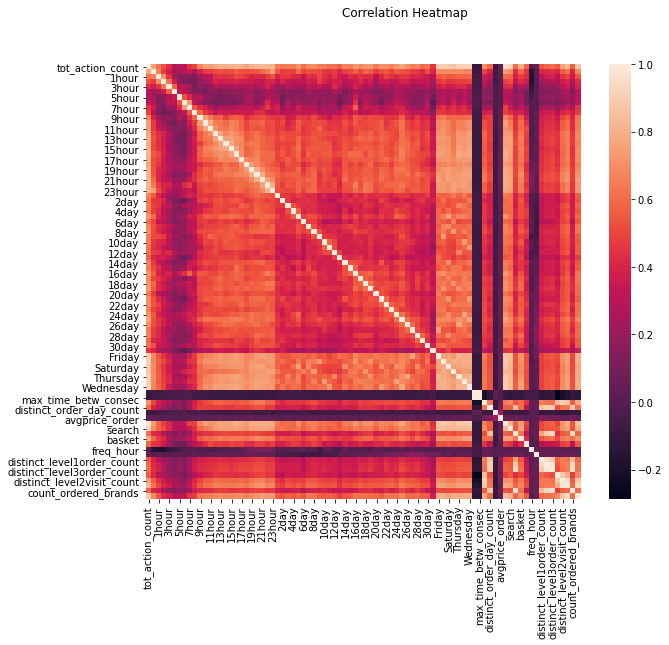

In [39]:
#high correlations in numeric featuers 

pd.set_option('precision', 2)
plt.figure(figsize=(10,8))
sns.heatmap(scaled_numeric_test.corr(), square=True)
plt.suptitle("Correlation Heatmap")
plt.show

## PCA for numeric part

In [41]:
from sklearn.decomposition import PCA

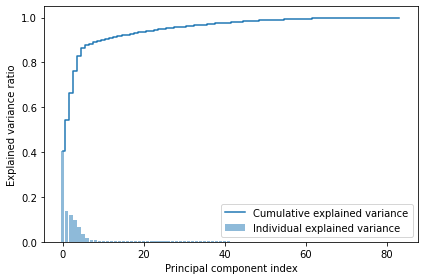

In [42]:
princomp = PCA()

X_train_pca = princomp.fit_transform(scaled_numeric)

exp_var_pca = princomp.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [43]:
cum_sum_eigenvalues

array([0.40702455, 0.54267668, 0.66292246, 0.7618587 , 0.82777719,
       0.86261752, 0.87799668, 0.88445744, 0.89052165, 0.89598574,
       0.9011413 , 0.90559534, 0.90988401, 0.91368485, 0.91747302,
       0.92107726, 0.92451903, 0.92777861, 0.93092915, 0.93396953,
       0.93684937, 0.93960287, 0.94223007, 0.94483064, 0.94729079,
       0.9496517 , 0.9519644 , 0.95415045, 0.9562574 , 0.95829332,
       0.9602765 , 0.96219624, 0.96406836, 0.96584063, 0.96757246,
       0.96924067, 0.9708385 , 0.97238668, 0.9738951 , 0.97536578,
       0.97676675, 0.97812603, 0.97942963, 0.9806752 , 0.98186997,
       0.98305809, 0.9841604 , 0.98521556, 0.98623078, 0.98720915,
       0.98809221, 0.9889452 , 0.98977524, 0.9905812 , 0.99133817,
       0.9920653 , 0.99274779, 0.99340635, 0.99401778, 0.99460512,
       0.99518033, 0.99573273, 0.99623152, 0.99669739, 0.9971268 ,
       0.99752433, 0.99787554, 0.99820617, 0.9984513 , 0.99867468,
       0.99887482, 0.99906392, 0.9992469 , 0.99942271, 0.99956

There are 84 numeric columns. PCA has showed that with 40 principal components 0.97536578 of the variance can be explained. 84 numerical features will be reduced to 40 with PCA.

In [44]:
princomp40 = PCA(n_components=40)
numeric_principal_df = pd.DataFrame(princomp40.fit_transform(scaled_numeric))


In [45]:
numeric_principal_df

0     1     2     3     4     5     6         7         8         9   \
0     0.94  0.73 -0.14 -0.09 -0.07 -0.27 -0.25 -1.15e-01 -8.33e-02 -7.79e-02   
1     1.26 -0.04  0.32  0.32  0.43 -0.49  0.21  4.62e-01 -2.44e-02  3.72e-02   
2     0.06 -0.13  0.37  0.02  0.02  0.20  0.09 -4.78e-02  9.68e-03 -1.25e-02   
3     2.25  1.00 -0.13  0.64  1.03  0.13  0.17 -6.55e-02  2.09e-01 -4.04e-02   
4     1.65  0.04 -0.36  0.50  0.67 -0.35 -0.04 -1.55e-01 -5.07e-02 -3.09e-02   
...    ...   ...   ...   ...   ...   ...   ...       ...       ...       ...   
5611 -0.71 -0.11  0.15  1.28 -0.37  0.06 -0.01 -4.62e-04  5.17e-04  7.74e-03   
5612 -0.68 -0.09  0.34  1.25 -0.42 -0.06  0.04  6.76e-03  7.68e-03 -1.35e-02   
5613 -0.68 -0.15  0.24  1.26 -0.42 -0.06  0.04  4.09e-03  1.26e-02 -1.07e-02   
5614 -0.52  0.23  0.06 -0.08  0.19  0.02 -0.03  4.74e-03 -2.16e-02 -7.47e-03   
5615 -0.71  0.31 -0.01  1.17 -0.43 -0.06  0.04  1.17e-03  6.74e-03 -2.74e-03   

            10        11        12        13        14        15        16  \
0     7.58e-02 -1.24e-01 -5.95e-03  3.75e-02  5.20e-02  1.02e-01  5.32e-02   
1     8.90e-03 -2.32e-01 -4.12e-01 -4.98e-01 -1.92e-01 -4.07e-01  2.96e-02   
2    -9.88e-03  8.60e-03 -6.63e-02 -3.08e-02 -8.04e-03 -4.28e-03  2.59e-02   
3    -2.89e-01 -2.63e-01  4.76e-02 -1.59e-01  1.86e-01 -1.28e-02 -3.37e-02   
4     2.08e-02 -2.56e-01 -4.02e-02 -2.90e-02 -1.44e-01 -1.24e-01  2.33e-01   
...        ...       ...       ...       ...       ...       ...       ...   
5611  1.40e-02 -9.74e-03 -4.83e-03  2.43e-02  1.32e-02 -1.26e-02  1.05e-03   
5612  6.26e-03 -8.82e-03  1.80e-03  2.59e-02 -1.61e-04  7.16e-04 -5.78e-03   
5613  7.87e-03 -5.76e-03  7.63e-03  2.66e-02 -1.58e-02  1.14e-02 -1.46e-02   
5614 -1.45e-02  8.59e-04 -5.62e-03 -5.12e-03  7.08e-03  5.53e-04  2.08e-03   
5615 -2.38e-03  7.86e-04  1.61e-03 -2.07e-03 -3.44e-03  3.84e-03 -6.48e-04   

            17        18        19        20        21        22        23  \
0    -1.30e-03 -2.89e-02 -7.17e-02 -3.57e-02 -4.23e-02  3.19e-03 -1.19e-02   
1     5.08e-02  1.41e-02 -2.86e-01 -2.30e-01  1.14e-01 -2.64e-02  5.53e-03   
2     2.97e-02 -2.78e-02 -1.15e-01  6.32e-02  6.98e-02 -1.84e-02 -4.18e-03   
3    -3.01e-01 -3.77e-02 -5.95e-01  7.41e-02  1.99e-01  7.15e-02  6.55e-03   
4    -1.77e-01 -1.56e-01 -1.93e-01  8.84e-02  9.91e-02 -1.64e-01 -2.64e-02   
...        ...       ...       ...       ...       ...       ...       ...   
5611  5.91e-04 -3.20e-03 -5.88e-04 -4.24e-03 -6.57e-04  1.69e-03  2.45e-02   
5612 -5.32e-03  5.89e-03 -3.45e-03  6.83e-03 -3.42e-03  1.23e-03 -3.56e-02   
5613 -2.19e-02 -1.33e-03 -4.14e-03 -6.96e-03  1.80e-02 -3.16e-03  2.12e-01   
5614  3.27e-03 -1.50e-03  2.48e-03  6.45e-03 -3.43e-03  7.58e-04 -1.58e-02   
5615 -3.82e-04  1.95e-03 -3.72e-04  3.52e-03 -1.12e-03  3.36e-04 -2.99e-02   

            24        25        26        27        28        29        30  \
0    -6.07e-02  8.53e-02 -4.54e-02 -3.54e-02 -1.73e-02 -5.65e-02 -6.51e-02   
1    -1.68e-01 -7.21e-02  1.04e-01 -9.78e-02 -5.15e-02  2.59e-01  7.33e-02   
2    -1.09e-02 -1.38e-01  2.51e-02  5.08e-02  1.11e-01  3.66e-02 -1.05e-02   
3     2.73e-01 -1.45e-01  2.91e-01 -4.90e-02 -2.72e-01 -3.39e-01 -1.68e-01   
4    -1.30e-01  1.75e-01  1.38e-02 -3.27e-01 -6.43e-02 -1.88e-01  1.67e-01   
...        ...       ...       ...       ...       ...       ...       ...   
5611 -3.53e-03 -5.53e-04 -1.80e-03 -4.85e-03 -3.26e-03 -8.74e-04  5.16e-03   
5612  2.97e-03  2.94e-03 -1.99e-03 -2.80e-03 -3.61e-03 -5.50e-03  4.94e-03   
5613 -1.36e-02  5.73e-03 -1.92e-04  3.77e-04 -8.14e-04 -7.97e-03  3.29e-03   
5614  1.17e-03  1.98e-04  1.97e-03  2.13e-04  2.65e-04 -2.73e-04 -3.62e-03   
5615  3.19e-03  1.29e-04 -2.61e-04  7.99e-04  3.99e-04 -5.70e-04  2.82e-04   

            31        32        33        34        35        36        37  \
0    -2.55e-03 -4.11e-02  9.07e-02 -1.29e-02  2.63e-02  2.70e-02 -7.48e-02   
1     3.53e-02  9.75e-02 -7.75e-02  1.12e-01 -1.71e-01  4.47e-02  9.33e-02   
2 

In [46]:
#for test data

In [47]:
test_numeric_principal_df = pd.DataFrame(princomp40.transform(scaled_numeric_test))


In [48]:
test_numeric_principal_df 

0     1         2     3     4     5     6         7         8   \
0     0.93 -0.39  1.95e-01  0.18  0.05 -0.04 -0.19 -2.45e-01 -1.64e-01   
1     3.72  0.53  2.35e-01  1.69  2.50  0.35  0.77  6.37e-01 -5.09e-01   
2     1.22 -0.28 -2.51e-03  0.26  0.18 -0.10 -0.01 -2.11e-01 -4.88e-02   
3     0.87  0.07  2.66e-01  0.02 -0.10 -0.05 -0.12 -1.09e-02 -4.77e-02   
4     2.85  0.17 -1.82e-01  1.24  1.84 -0.30  0.51 -6.90e-01 -8.18e-01   
...    ...   ...       ...   ...   ...   ...   ...       ...       ...   
2375 -0.76  0.06 -4.57e-01  1.23 -0.37 -0.04 -0.01 -2.61e-04 -1.63e-02   
2376 -0.73  0.60 -3.24e-01  1.11 -0.44 -0.06  0.03 -4.58e-03  5.85e-03   
2377 -0.69  0.21  3.78e-01  1.19 -0.43 -0.06  0.03  5.12e-03  1.16e-02   
2378 -0.71 -0.08  1.94e-01  1.28 -0.38  0.06 -0.01  7.58e-04 -9.25e-04   
2379 -0.74 -0.08  1.96e-01  1.27 -0.37 -0.04 -0.02  6.65e-03 -6.96e-03   

            9         10        11        12        13        14        15  \
0     8.14e-02 -2.22e-02 -1.32e-01 -8.84e-02 -6.24e-02 -1.75e-01  9.03e-02   
1    -2.64e-01  4.23e-01 -2.74e-01 -1.26e-02 -2.35e-01 -2.72e-01  1.20e-01   
2    -1.56e-01 -3.17e-01  6.43e-02  4.85e-02  1.33e-01 -2.32e-01  2.48e-01   
3    -3.47e-02 -1.25e-01  8.67e-03 -3.31e-02  7.68e-03  5.14e-02  6.24e-02   
4     8.84e-01  1.00e-01  6.86e-01 -3.20e-01  8.32e-01  9.22e-02  2.76e-01   
...        ...       ...       ...       ...       ...       ...       ...   
2375  5.96e-03 -2.55e-03  1.11e-02  2.17e-03 -1.11e-02 -1.42e-02 -6.73e-03   
2376  5.82e-03 -9.17e-03  1.09e-02  2.26e-03 -2.52e-02 -7.63e-03  7.11e-03   
2377 -1.31e-02  2.83e-03 -9.26e-03  9.59e-04  1.65e-02  5.62e-03  4.59e-03   
2378  6.17e-03  1.34e-02 -1.08e-02 -6.61e-03  2.44e-02  1.74e-02 -1.47e-02   
2379 -1.08e-02  5.56e-03 -5.82e-03  4.40e-04  2.04e-02  3.09e-04 -4.34e-03   

            16        17        18        19        20        21        22  \
0    -2.05e-01  9.84e-02 -1.46e-01  9.09e-02 -2.23e-02  2.04e-01 -4.40e-02   
1    -1.09e+00  2.46e-01  5.88e-01  1.93e-02 -6.92e-01  4.65e-01  1.19e-01   
2    -1.64e-01 -7.32e-03  1.15e-01  1.74e-01 -7.79e-02  5.00e-03 -2.30e-02   
3    -6.70e-02  1.22e-01  6.48e-02 -9.57e-02 -3.64e-02  4.77e-02 -4.27e-02   
4    -8.38e-01 -3.36e-01 -3.39e-01 -2.63e-01 -2.64e-01  5.60e-01  8.15e-01   
...        ...       ...       ...       ...       ...       ...       ...   
2375  7.88e-03  6.38e-03 -1.95e-04 -5.20e-03 -4.06e-03 -2.98e-03  1.53e-03   
2376  3.64e-03  1.78e-03 -5.91e-04  2.36e-03 -2.07e-03  3.68e-03 -1.49e-03   
2377 -7.55e-03 -4.06e-03  4.62e-03  7.27e-04  8.03e-03 -3.71e-03  1.88e-04   
2378  2.32e-03  4.36e-03 -1.21e-03  2.54e-04 -2.96e-04 -5.91e-03  2.72e-03   
2379 -3.37e-03 -1.85e-03  2.77e-03 -3.49e-03  4.49e-03 -5.51e-03  1.68e-03   

            23        24        25        26        27        28        29  \
0    -3.43e-02  1.60e-01  5.82e-02  1.54e-01 -8.09e-03  7.52e-02 -4.40e-02   
1    -9.13e-02  1.03e-01  9.05e-04 -9.13e-02 -3.30e-01  1.42e+00  4.26e-01   
2    -3.60e-02  8.30e-02 -1.37e-01  2.65e-02  1.93e-01  2.27e-01 -1.24e-01   
3     3.16e-03  8.41e-02 -9.82e-03 -4.04e-02 -4.67e-02  6.70e-02  7.77e-03   
4    -1.37e-01 -2.68e-02  7.92e-01  3.50e-01 -2.53e-01  6.29e-01  1.42e-01   
...        ...       ...       ...       ...       ...       ...       ...   
2375 -3.48e-02  2.10e-03 -5.93e-03 -4.06e-03  1.22e-03 -1.67e-03 -2.05e-03   
2376  1.48e-04  1.10e-03 -1.51e-03  1.66e-03  3.76e-03  3.97e-03  3.99e-03   
2377 -3.97e-02  3.76e-03  4.30e-03  1.70e-03 -1.54e-03 -1.14e-03 -2.17e-03   
2378 -3.45e-02  8.28e-04 -6.32e-05 -2.53e-03 -4.37e-03 -4.25e-03 -1.43e-03   
2379 -3.62e-02  2.47e-03  7.35e-04 -2.44e-03 -2.47e-03 -3.69e-03 -5.14e-03   

            30        31        32        33        34        35        36  \
0     1.11e-01  1.66e-01 -4.91e-02 -6.71e-02  6.60e-02 -2.32e-02 -2.99e-02   
1     6.67e-01  9.98e-01  4.29e-01 -1.52e+00  2.70e-01 -6.07e-02 -1.16e-02   
2     1.11e-01  3.23e-01  1.60e-01 -3.19e-01  1.67e-01 -9.91e-02  1.31e-02

## CATEGORICAL VARIABLES

In [49]:
cat_df_train =train[catvars_train]

In [50]:
print(cat_df_train.freq_level1_cat.nunique())
pd.DataFrame(cat_df_train.freq_level1_cat.value_counts()).transpose()
#keep them all

10


Giyim  Ev & Mobilya  Elektronik  Ayakkabı  Yaşam  \
freq_level1_cat   2402           832         599       502    391   

                 Süpermarket  Aksesuar  Kozmetik & Kişisel Bakım  \
freq_level1_cat          328       240                       172   

                 Spor & Outdoor  Anne & Bebek & Çocuk  
freq_level1_cat              79                    71

In [51]:
print(cat_df_train.freq_level2_cat.nunique())
pd.DataFrame(cat_df_train.freq_level2_cat.value_counts()).transpose()


79


Üst Giyim  Bot & Çizme  Sofra & Mutfak  Alt Giyim  Dış Giyim  \
freq_level2_cat       1230          302             270        259        248   

                 Spor Ayakkabı  Mobilya  Ev Tekstili  Bilgisayar Tablet  \
freq_level2_cat            217      216          166                151   

                 Telefon  Sağlık  Otomobil & Motosiklet  Gıda & İçecek  Saat  \
freq_level2_cat      130     126                    117            115   100   

                 Bahçe ve Yapı Market  Kitap  Oyuncak  Ev Dekorasyon  Çanta  \
freq_level2_cat                    97     90       90             87     86   

                 TV, Görüntü & Ses Sistemleri  Ev Giyim  Takı & Mücevher  \
freq_level2_cat                            86        82               79   

                 Elektrikli Ev Aletleri  İç Giyim  \
freq_level2_cat                      77        72   

                 Kırtasiye & Ofis Malzemeleri  Elbise  Ekipman & Aksesuar  \
freq_level2_cat                            66      65                  62   

                 Cilt Bakım  Hobi & Eğlence  Spor Giyim  Tesettür Giyim  \
freq_level2_cat          60              58          52              52   

                 Günlük Ayakkabı  Makyaj  Ev Bakım ve Temizlik  \
freq_level2_cat               45      42                    42   

                 Giyilebilir Teknoloji  Pet Shop  Elektrik & Aydınlatma  \
freq_level2_cat                     36        35                     31   

                 Anne & Bebek Bakım  Banyo  Kişisel Bakım Aletleri  \
freq_level2_cat                  31     28                      28   

                 Fantezi Giyim  Saç Bakım  Ev Gereçleri  Bebek Giyim  \
freq_level2_cat             27         26            25           22   

                 Çocuk Gereçleri  Beyaz Eşya  Parfüm  Oyun & Oyun Konsolları  \
freq_level2_cat               21          20      19                      19   

                 Dijital Kod & Ürünler  Ağız Bakım  Klima & Isıtıcı  \
freq_level2_cat                     19          16               16   

                 Büyük Beden  Ev Terliği & Botu  Vücut Bakımı  \
freq_level2_cat           16                 14            13   

                 Abiye & Mezuniyet Elbisesi  Gözlük  Plaj Giyim  \
freq_level2_cat                          12      11          11   

                 Atkı & Bere & Eldiven  Diğer Aksesuar  \
freq_level2_cat                      9               8   

                 Tıraş, Ağda ve Epilasyon  Sandalet ve Terlik  Hamile Giyim  \
freq_level2_cat                         8                   8             6   

                 Kemer & Pantolon Askısı  Bebek Beslenme & Emzirme  \
freq_level2_cat                        5                         5   

                 Saç Aksesuarı  Foto & Kamera  Topuklu Ayakkabı  Takımlar  \
freq_level2_cat              5              4                 4         4   

                 Parfüm Seti  Yazıcı & Tarayıcı  Salopet & Tulum  \
freq_level2_cat            3                  2                2   

                 Takım Elbise  Forma  Şapka  Ayakkabı Bakım Malzemeleri  \
freq_level2_cat             2      2      1                           1   

                 Diğer Kişisel Bakım Ürünleri  Altın  Kravat & Kol Düğmesi  \
freq_level2_cat                             1      1                     1   

                 Bebek Beslenme&Emzirme  
freq_level2_cat                       1

In [52]:
print(cat_df_train.freq_level3_cat.nunique())
pd.DataFrame(cat_df_train.freq_level3_cat.value_counts()).transpose()


393


Sweatshirt  Kazak & Hırka  Bot & Bootie  Kaban & Mont  \
freq_level3_cat         390            388           369           238   

                 Sneaker  Sofra  Elbise  Yatak Odası Tekstili  Saat  Otomobil  \
freq_level3_cat      181    180     123                   120   117       115   

                 Pijama  Eşofman  Yapı Market  Müzik Sistemleri  \
freq_level3_cat     106       96           82                74   

                 Akıllı Cep Telefonu  Medikal Maske  Salon & Oturma Odası  \
freq_level3_cat                   71             66                    65   

                 Gömlek  T-Shirt  Jeans  Cep Telefonu Aksesuar  Pantolon  \
freq_level3_cat      62       61     60                     60        57   

                 Ceket & Yelek  Eğitim  Pişirme  Bluz & Tunik  \
freq_level3_cat             55      54       46            45   

                 Halı & Kilim & Paspas  Süpürge  Bebek Bakım  Atıştırmalık  \
freq_level3_cat                     42       40           37            37   

                 Çalışma Odası  Kırtasiye  Tablo  Kolye  Yatak Odası  \
freq_level3_cat             35         33     33     32           32   

                 Genel Sağlık  Avize  Dizüstü Bilgisayar  Mutfak  \
freq_level3_cat            32     30                  29      29   

                 Parti Malzemeleri  Casual Ayakkabı  Oyuncu Bilgisayarları  \
freq_level3_cat                 28               28                     28   

                 Gıda Takviyesi & Vitamin  Mutfak Saklama ve Düzenleme  \
freq_level3_cat                        27                           27   

                 Parfüm  Bahçe  Omuz Çantası  Sütyen  Fantezi İç Giyim  \
freq_level3_cat      26     25            25      24                24   

                 Tıraş Makinesi  Çizme  Kedi Ürünleri  Kamp  \
freq_level3_cat              24     22             22    22   

                 Bilgisayar Bileşenleri  Çorap  Alt-Üst Takım  \
freq_level3_cat                      22     22             21   

                 Çocuk ve Ebeveyn Kitapları  Sırt Çantası  Akıllı Saat  Perde  \
freq_level3_cat                          19            19           19     18   

                 Cüzdan  Dijital Kart & Kupon  Güneş Gözlüğü  Ten Makyajı  \
freq_level3_cat      18                    17             17           16   

                 Bileklik  Cilt Bakım Aletleri  Küpe  Kahvaltılık  \
freq_level3_cat        16                   16    16           16   

                 Koşu & Antrenman Ayakkabısı  Abiye & Mezuniyet Elbisesi  \
freq_level3_cat                           16                          14   

                 Ev ve Temizlik Gereçleri  Yüzük  Çamaşır Yıkama  Çay  \
freq_level3_cat                        14     14              14   14   

                 Masaüstü Gereçleri  Bulaşık Yıkama  Kahve Makinesi  Şampuan  \
freq_level3_cat                  14              13              12       12   

                 Havlu&Havlu Seti  Yemek Hazırlık  Bebek Takımları  Tayt  \
freq_level3_cat                12              12               12    12   

                 Televizyon  Yürüyüş Ayakkabısı  Akıllı Bileklik  \
freq_level3_cat          12                  12               11   

                 Oyuncak Bebek ve Aksesuarları  Göz Makyajı  Babet  \
freq_level3_cat                             11           11     11   

                 Köpek Ürünleri  Yağ ve Sos  Yılbaşı Ürünleri  \
freq_level3_cat              11          10                10   

                 Hobi, Sanat, Akademik  Fitness & Vücut Geliştirme  \
freq_level3_cat                     10                          10   

                 Roman, Hikaye ve Edebiyat  Terlik  Klasik Ayakkabı  \
freq_level3_cat                          9       9                9   

                 Antre & Hol  Etek  Kutu Oyunları  Sanatsal Malzemeler  \
freq_level3_cat            9     9              9                    9   

                 Gecelik  Kahve  Motosiklet  Spor Sweatshirt  Soba

In [53]:
#get dummies for categorical variables
train_cat = pd.get_dummies(train[catvars_train])
test_cat = pd.get_dummies(test[catvars_test])

In [54]:
#get the columns appearing in both
train_cat.columns[train_cat.columns.isin(test_cat.columns)==False]  #'freq_level3_cat_Akıllı Bileklik' test datasında yokmuş
train_cat.drop('freq_level3_cat_Akıllı Bileklik', axis=1, inplace=True)


In [55]:
#check one-unique value columns
(train_cat.nunique() == 1).sum()  #none

0

In [56]:
#check col sums to observe variance

colsums= pd.DataFrame(train_cat.sum(axis=0))


In [57]:
colsums.shape  #488 encoded variables

(488, 1)

In [58]:
colsums.transpose()

freq_dow_Friday  freq_dow_Monday  freq_dow_Saturday  freq_dow_Sunday  \
0              804              649                676              761   

   freq_dow_Thursday  freq_dow_Tuesday  freq_dow_Wednesday  \
0                897               780                1049   

   freq_level1_cat_Aksesuar  freq_level1_cat_Anne & Bebek & Çocuk  \
0                       240                                    71   

   freq_level1_cat_Ayakkabı  freq_level1_cat_Elektronik  \
0                       502                         599   

   freq_level1_cat_Ev & Mobilya  freq_level1_cat_Giyim  \
0                           832                   2402   

   freq_level1_cat_Kozmetik & Kişisel Bakım  freq_level1_cat_Spor & Outdoor  \
0                                       172                              79   

   freq_level1_cat_Süpermarket  freq_level1_cat_Yaşam  \
0                          328                    391   

   freq_level2_cat_Abiye & Mezuniyet Elbisesi  freq_level2_cat_Alt Giyim  \
0                                          12                        259   

   freq_level2_cat_Altın  freq_level2_cat_Anne & Bebek Bakım  \
0                      1                                  31   

   freq_level2_cat_Atkı & Bere & Eldiven  \
0                                      9   

   freq_level2_cat_Ayakkabı Bakım Malzemeleri  freq_level2_cat_Ağız Bakım  \
0                                           1                          16   

   freq_level2_cat_Bahçe ve Yapı Market  freq_level2_cat_Banyo  \
0                                    97                     28   

   freq_level2_cat_Bebek Beslenme & Emzirme  \
0                                         5   

   freq_level2_cat_Bebek Beslenme&Emzirme  freq_level2_cat_Bebek Giyim  \
0                                       1                           22   

   freq_level2_cat_Beyaz Eşya  freq_level2_cat_Bilgisayar Tablet  \
0                          20                                151   

   freq_level2_cat_Bot & Çizme  freq_level2_cat_Büyük Beden  \
0                          302                           16   

   freq_level2_cat_Cilt Bakım  freq_level2_cat_Dijital Kod & Ürünler  \
0                          60                                     19   

   freq_level2_cat_Diğer Aksesuar  \
0                               8   

   freq_level2_cat_Diğer Kişisel Bakım Ürünleri  freq_level2_cat_Dış Giyim  \
0                                             1                        248   

   freq_level2_cat_Ekipman & Aksesuar  freq_level2_cat_Elbise  \
0                                  62                      65   

   freq_level2_cat_Elektrik & Aydınlatma  \
0                                     31   

   freq_level2_cat_Elektrikli Ev Aletleri  \
0                                      77   

   freq_level2_cat_Ev Bakım ve Temizlik  freq_level2_cat_Ev Dekorasyon  \
0                                    42                             87   

   freq_level2_cat_Ev Gereçleri  freq_level2_cat_Ev Giyim  \
0                            25                        82   

   freq_level2_cat_Ev Tekstili  freq_level2_cat_Ev Terliği & Botu  \
0                          166                                 14   

   freq_level2_cat_Fantezi Giyim  freq_level2_cat_Forma  \
0                             27                      2   

   freq_level2_cat_Foto & Kamera  freq_level2_cat_Giyilebilir Teknoloji  \
0                              4                                     36   

   freq_level2_cat_Gözlük  freq_level2_cat_Günlük Ayakkabı  \
0                      11                               45   

   freq_level2_cat_Gıda & İçecek  freq_level2_cat_Hamile Giyim  \
0                            115                             6   

   freq_level2_cat_Hobi & Eğlence  freq_level2_cat_Kemer & Pantolon Askısı  \
0                              58                                        5   

   freq_level2_cat_Kitap  freq_level2_cat_Kişisel Bakım Aletleri  \
0                     90                                   

In [59]:
#drop the ones appearing less than 10
train_cat.columns[train_cat.sum(axis=0)>10]

to_drop = train_cat.columns[train_cat.sum(axis=0)<10]

In [60]:
train_cat.drop(to_drop,axis=1, inplace=True)  

In [61]:
train_cat.shape  #166 columns left

(5616, 166)

In [62]:
#check column names - meanings
pd.DataFrame(train_cat.sum(axis=0)).transpose()

freq_dow_Friday  freq_dow_Monday  freq_dow_Saturday  freq_dow_Sunday  \
0              804              649                676              761   

   freq_dow_Thursday  freq_dow_Tuesday  freq_dow_Wednesday  \
0                897               780                1049   

   freq_level1_cat_Aksesuar  freq_level1_cat_Anne & Bebek & Çocuk  \
0                       240                                    71   

   freq_level1_cat_Ayakkabı  freq_level1_cat_Elektronik  \
0                       502                         599   

   freq_level1_cat_Ev & Mobilya  freq_level1_cat_Giyim  \
0                           832                   2402   

   freq_level1_cat_Kozmetik & Kişisel Bakım  freq_level1_cat_Spor & Outdoor  \
0                                       172                              79   

   freq_level1_cat_Süpermarket  freq_level1_cat_Yaşam  \
0                          328                    391   

   freq_level2_cat_Abiye & Mezuniyet Elbisesi  freq_level2_cat_Alt Giyim  \
0                                          12                        259   

   freq_level2_cat_Anne & Bebek Bakım  freq_level2_cat_Ağız Bakım  \
0                                  31                          16   

   freq_level2_cat_Bahçe ve Yapı Market  freq_level2_cat_Banyo  \
0                                    97                     28   

   freq_level2_cat_Bebek Giyim  freq_level2_cat_Beyaz Eşya  \
0                           22                          20   

   freq_level2_cat_Bilgisayar Tablet  freq_level2_cat_Bot & Çizme  \
0                                151                          302   

   freq_level2_cat_Büyük Beden  freq_level2_cat_Cilt Bakım  \
0                           16                          60   

   freq_level2_cat_Dijital Kod & Ürünler  freq_level2_cat_Dış Giyim  \
0                                     19                        248   

   freq_level2_cat_Ekipman & Aksesuar  freq_level2_cat_Elbise  \
0                                  62                      65   

   freq_level2_cat_Elektrik & Aydınlatma  \
0                                     31   

   freq_level2_cat_Elektrikli Ev Aletleri  \
0                                      77   

   freq_level2_cat_Ev Bakım ve Temizlik  freq_level2_cat_Ev Dekorasyon  \
0                                    42                             87   

   freq_level2_cat_Ev Gereçleri  freq_level2_cat_Ev Giyim  \
0                            25                        82   

   freq_level2_cat_Ev Tekstili  freq_level2_cat_Ev Terliği & Botu  \
0                          166                                 14   

   freq_level2_cat_Fantezi Giyim  freq_level2_cat_Giyilebilir Teknoloji  \
0                             27                                     36   

   freq_level2_cat_Gözlük  freq_level2_cat_Günlük Ayakkabı  \
0                      11                               45   

   freq_level2_cat_Gıda & İçecek  freq_level2_cat_Hobi & Eğlence  \
0                            115                              58   

   freq_level2_cat_Kitap  freq_level2_cat_Kişisel Bakım Aletleri  \
0                     90                                      28   

   freq_level2_cat_Klima & Isıtıcı  \
0                               16   

   freq_level2_cat_Kırtasiye & Ofis Malzemeleri  freq_level2_cat_Makyaj  \
0                                            66                      42   

   freq_level2_cat_Mobilya  freq_level2_cat_Otomobil & Motosiklet  \
0                      216                                    117   

   freq_level2_cat_Oyun & Oyun Konsolları  freq_level2_cat_Oyuncak  \
0                                      19                       90   

   freq_level2_cat_Parfüm  freq_level2_cat_Pet Shop  \
0                      19                        35   

   freq_level2_cat_Plaj Giyim  freq_level2_cat_Saat  \
0                          11                   100   

   freq_level2_cat_Saç Bakım  freq_level2_cat_Sağlık  \
0                         26                     126   

   fre

Most frequently actioned category variables are too many. To reduce the number check columns and meanings.

freq_level3_cat_Şampuan  -12

freq_level3_cat_Çorap  -22

freq_level3_cat_Çay  -14

freq_level3_cat_Köpek Ürünleri   -11

freq_level3_cat_Kedi Ürünleri  -22

freq_level2_cat_Pet Shop  -35




In [63]:
train_cat.drop(["freq_level3_cat_Çorap","freq_level3_cat_Şampuan","freq_level3_cat_Çay","freq_level3_cat_Köpek Ürünleri",
                "freq_level3_cat_Kedi Ürünleri","freq_level2_cat_Pet Shop"],axis=1, inplace=True)  

In [64]:
train_cat.shape  #161 categorical columns

(5616, 160)

In [65]:
train_cat.head()

freq_dow_Friday  freq_dow_Monday  freq_dow_Saturday  freq_dow_Sunday  \
0                0                0                  0                1   
1                0                0                  0                0   
2                0                0                  1                0   
3                0                0                  1                0   
4                0                0                  0                1   

   freq_dow_Thursday  freq_dow_Tuesday  freq_dow_Wednesday  \
0                  0                 0                   0   
1                  1                 0                   0   
2                  0                 0                   0   
3                  0                 0                   0   
4                  0                 0                   0   

   freq_level1_cat_Aksesuar  freq_level1_cat_Anne & Bebek & Çocuk  \
0                         0                                     0   
1                         0                                     0   
2                         0                                     0   
3                         0                                     0   
4                         0                                     0   

   freq_level1_cat_Ayakkabı  freq_level1_cat_Elektronik  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   freq_level1_cat_Ev & Mobilya  freq_level1_cat_Giyim  \
0                             1                      0   
1                             0                      1   
2                             0                      1   
3                             0                      1   
4                             0                      0   

   freq_level1_cat_Kozmetik & Kişisel Bakım  freq_level1_cat_Spor & Outdoor  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         1                               0   

   freq_level1_cat_Süpermarket  freq_level1_cat_Yaşam  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   freq_level2_cat_Abiye & Mezuniyet Elbisesi  freq_level2_cat_Alt Giyim  \
0                                           0                          0   
1                                           0                          0   
2                                           0                          0   
3                                           0                          0   
4                                           0                          0   

   freq_level2_cat_Anne & Bebek Bakım  freq_level2_cat_Ağız Bakım  \
0                                   0                           0   
1                                   0                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   

   freq_level2_cat_Bahçe ve Yapı Market  freq_level2_cat_Banyo  \
0                                     0                      0   
1                                     0                      0   
2                                     0                      0   
3                                     0                      0   
4                                     0 

In [66]:
#apply to test 

In [67]:
catcols = train_cat.columns

In [68]:
test_cat = test_cat[catcols]
#ERROR ['freq_level3_cat_Akıllı Bileklik'] not in index"
#drop 'freq_level3_cat_Akıllı Bileklik' from train_cat

In [69]:
test_cat.shape

(2380, 160)

In [70]:
test_cat.head()

freq_dow_Friday  freq_dow_Monday  freq_dow_Saturday  freq_dow_Sunday  \
0                1                0                  0                0   
1                0                0                  0                0   
2                0                0                  0                0   
3                0                0                  1                0   
4                0                0                  0                1   

   freq_dow_Thursday  freq_dow_Tuesday  freq_dow_Wednesday  \
0                  0                 0                   0   
1                  0                 0                   1   
2                  0                 0                   1   
3                  0                 0                   0   
4                  0                 0                   0   

   freq_level1_cat_Aksesuar  freq_level1_cat_Anne & Bebek & Çocuk  \
0                         0                                     0   
1                         0                                     0   
2                         0                                     0   
3                         0                                     0   
4                         0                                     0   

   freq_level1_cat_Ayakkabı  freq_level1_cat_Elektronik  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   freq_level1_cat_Ev & Mobilya  freq_level1_cat_Giyim  \
0                             0                      1   
1                             0                      1   
2                             0                      1   
3                             0                      1   
4                             0                      1   

   freq_level1_cat_Kozmetik & Kişisel Bakım  freq_level1_cat_Spor & Outdoor  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               0   

   freq_level1_cat_Süpermarket  freq_level1_cat_Yaşam  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   

   freq_level2_cat_Abiye & Mezuniyet Elbisesi  freq_level2_cat_Alt Giyim  \
0                                           0                          0   
1                                           0                          0   
2                                           0                          0   
3                                           0                          0   
4                                           0                          0   

   freq_level2_cat_Anne & Bebek Bakım  freq_level2_cat_Ağız Bakım  \
0                                   0                           0   
1                                   0                           0   
2                                   0                           0   
3                                   0                           0   
4                                   0                           0   

   freq_level2_cat_Bahçe ve Yapı Market  freq_level2_cat_Banyo  \
0                                     0                      0   
1                                     0                      0   
2                                     0                      0   
3                                     0                      0   
4                                     0 

Combining numeric and categorical features

### TRAIN

In [73]:
#This cell is for trials without PCA

#numeric_principal_df = scaled_numeric   

In [74]:
train_df = pd.DataFrame()

In [75]:
train_df = pd.concat([numeric_principal_df.reset_index(drop=True), (train_cat).reset_index(drop=True)], axis=1)

In [76]:
train_df = pd.concat([train_df.reset_index(drop=True), train["gender"]],axis=1)

In [77]:
train_df

0     1     2     3     4     5     6         7         8         9  \
0     0.94  0.73 -0.14 -0.09 -0.07 -0.27 -0.25 -1.15e-01 -8.33e-02 -7.79e-02   
1     1.26 -0.04  0.32  0.32  0.43 -0.49  0.21  4.62e-01 -2.44e-02  3.72e-02   
2     0.06 -0.13  0.37  0.02  0.02  0.20  0.09 -4.78e-02  9.68e-03 -1.25e-02   
3     2.25  1.00 -0.13  0.64  1.03  0.13  0.17 -6.55e-02  2.09e-01 -4.04e-02   
4     1.65  0.04 -0.36  0.50  0.67 -0.35 -0.04 -1.55e-01 -5.07e-02 -3.09e-02   
...    ...   ...   ...   ...   ...   ...   ...       ...       ...       ...   
5611 -0.71 -0.11  0.15  1.28 -0.37  0.06 -0.01 -4.62e-04  5.17e-04  7.74e-03   
5612 -0.68 -0.09  0.34  1.25 -0.42 -0.06  0.04  6.76e-03  7.68e-03 -1.35e-02   
5613 -0.68 -0.15  0.24  1.26 -0.42 -0.06  0.04  4.09e-03  1.26e-02 -1.07e-02   
5614 -0.52  0.23  0.06 -0.08  0.19  0.02 -0.03  4.74e-03 -2.16e-02 -7.47e-03   
5615 -0.71  0.31 -0.01  1.17 -0.43 -0.06  0.04  1.17e-03  6.74e-03 -2.74e-03   

            10        11        12        13        14        15        16  \
0     7.58e-02 -1.24e-01 -5.95e-03  3.75e-02  5.20e-02  1.02e-01  5.32e-02   
1     8.90e-03 -2.32e-01 -4.12e-01 -4.98e-01 -1.92e-01 -4.07e-01  2.96e-02   
2    -9.88e-03  8.60e-03 -6.63e-02 -3.08e-02 -8.04e-03 -4.28e-03  2.59e-02   
3    -2.89e-01 -2.63e-01  4.76e-02 -1.59e-01  1.86e-01 -1.28e-02 -3.37e-02   
4     2.08e-02 -2.56e-01 -4.02e-02 -2.90e-02 -1.44e-01 -1.24e-01  2.33e-01   
...        ...       ...       ...       ...       ...       ...       ...   
5611  1.40e-02 -9.74e-03 -4.83e-03  2.43e-02  1.32e-02 -1.26e-02  1.05e-03   
5612  6.26e-03 -8.82e-03  1.80e-03  2.59e-02 -1.61e-04  7.16e-04 -5.78e-03   
5613  7.87e-03 -5.76e-03  7.63e-03  2.66e-02 -1.58e-02  1.14e-02 -1.46e-02   
5614 -1.45e-02  8.59e-04 -5.62e-03 -5.12e-03  7.08e-03  5.53e-04  2.08e-03   
5615 -2.38e-03  7.86e-04  1.61e-03 -2.07e-03 -3.44e-03  3.84e-03 -6.48e-04   

            17        18        19        20        21        22        23  \
0    -1.30e-03 -2.89e-02 -7.17e-02 -3.57e-02 -4.23e-02  3.19e-03 -1.19e-02   
1     5.08e-02  1.41e-02 -2.86e-01 -2.30e-01  1.14e-01 -2.64e-02  5.53e-03   
2     2.97e-02 -2.78e-02 -1.15e-01  6.32e-02  6.98e-02 -1.84e-02 -4.18e-03   
3    -3.01e-01 -3.77e-02 -5.95e-01  7.41e-02  1.99e-01  7.15e-02  6.55e-03   
4    -1.77e-01 -1.56e-01 -1.93e-01  8.84e-02  9.91e-02 -1.64e-01 -2.64e-02   
...        ...       ...       ...       ...       ...       ...       ...   
5611  5.91e-04 -3.20e-03 -5.88e-04 -4.24e-03 -6.57e-04  1.69e-03  2.45e-02   
5612 -5.32e-03  5.89e-03 -3.45e-03  6.83e-03 -3.42e-03  1.23e-03 -3.56e-02   
5613 -2.19e-02 -1.33e-03 -4.14e-03 -6.96e-03  1.80e-02 -3.16e-03  2.12e-01   
5614  3.27e-03 -1.50e-03  2.48e-03  6.45e-03 -3.43e-03  7.58e-04 -1.58e-02   
5615 -3.82e-04  1.95e-03 -3.72e-04  3.52e-03 -1.12e-03  3.36e-04 -2.99e-02   

            24        25        26        27        28        29        30  \
0    -6.07e-02  8.53e-02 -4.54e-02 -3.54e-02 -1.73e-02 -5.65e-02 -6.51e-02   
1    -1.68e-01 -7.21e-02  1.04e-01 -9.78e-02 -5.15e-02  2.59e-01  7.33e-02   
2    -1.09e-02 -1.38e-01  2.51e-02  5.08e-02  1.11e-01  3.66e-02 -1.05e-02   
3     2.73e-01 -1.45e-01  2.91e-01 -4.90e-02 -2.72e-01 -3.39e-01 -1.68e-01   
4    -1.30e-01  1.75e-01  1.38e-02 -3.27e-01 -6.43e-02 -1.88e-01  1.67e-01   
...        ...       ...       ...       ...       ...       ...       ...   
5611 -3.53e-03 -5.53e-04 -1.80e-03 -4.85e-03 -3.26e-03 -8.74e-04  5.16e-03   
5612  2.97e-03  2.94e-03 -1.99e-03 -2.80e-03 -3.61e-03 -5.50e-03  4.94e-03   
5613 -1.36e-02  5.73e-03 -1.92e-04  3.77e-04 -8.14e-04 -7.97e-03  3.29e-03   
5614  1.17e-03  1.98e-04  1.97e-03  2.13e-04  2.65e-04 -2.73e-04 -3.62e-03   
5615  3.19e-03  1.29e-04 -2.61e-04  7.99e-04  3.99e-04 -5.70e-04  2.82e-04   

            31        32        33        34        35        36        37  \
0    -2.55e-03 -4.11e-02  9.07e-02 -1.29e-02  2.63e-02  2.70e-02 -7.48e-02   
1     3.53e-02  9.75e-02 -7.75e-02  1.12e-01 -1.71e-01  4.47e-02  9.33e-02   
2  

### TEST

In [79]:
#This cell is for trials without PCA

#test_numeric_principal_df = scaled_numeric_test 

In [80]:
test_df = pd.DataFrame()

In [81]:
test_df = pd.concat([test_numeric_principal_df.reset_index(drop=True), (test_cat).reset_index(drop=True)], axis=1)

In [82]:
test_df

0     1         2     3     4     5     6         7         8  \
0     0.93 -0.39  1.95e-01  0.18  0.05 -0.04 -0.19 -2.45e-01 -1.64e-01   
1     3.72  0.53  2.35e-01  1.69  2.50  0.35  0.77  6.37e-01 -5.09e-01   
2     1.22 -0.28 -2.51e-03  0.26  0.18 -0.10 -0.01 -2.11e-01 -4.88e-02   
3     0.87  0.07  2.66e-01  0.02 -0.10 -0.05 -0.12 -1.09e-02 -4.77e-02   
4     2.85  0.17 -1.82e-01  1.24  1.84 -0.30  0.51 -6.90e-01 -8.18e-01   
...    ...   ...       ...   ...   ...   ...   ...       ...       ...   
2375 -0.76  0.06 -4.57e-01  1.23 -0.37 -0.04 -0.01 -2.61e-04 -1.63e-02   
2376 -0.73  0.60 -3.24e-01  1.11 -0.44 -0.06  0.03 -4.58e-03  5.85e-03   
2377 -0.69  0.21  3.78e-01  1.19 -0.43 -0.06  0.03  5.12e-03  1.16e-02   
2378 -0.71 -0.08  1.94e-01  1.28 -0.38  0.06 -0.01  7.58e-04 -9.25e-04   
2379 -0.74 -0.08  1.96e-01  1.27 -0.37 -0.04 -0.02  6.65e-03 -6.96e-03   

             9        10        11        12        13        14        15  \
0     8.14e-02 -2.22e-02 -1.32e-01 -8.84e-02 -6.24e-02 -1.75e-01  9.03e-02   
1    -2.64e-01  4.23e-01 -2.74e-01 -1.26e-02 -2.35e-01 -2.72e-01  1.20e-01   
2    -1.56e-01 -3.17e-01  6.43e-02  4.85e-02  1.33e-01 -2.32e-01  2.48e-01   
3    -3.47e-02 -1.25e-01  8.67e-03 -3.31e-02  7.68e-03  5.14e-02  6.24e-02   
4     8.84e-01  1.00e-01  6.86e-01 -3.20e-01  8.32e-01  9.22e-02  2.76e-01   
...        ...       ...       ...       ...       ...       ...       ...   
2375  5.96e-03 -2.55e-03  1.11e-02  2.17e-03 -1.11e-02 -1.42e-02 -6.73e-03   
2376  5.82e-03 -9.17e-03  1.09e-02  2.26e-03 -2.52e-02 -7.63e-03  7.11e-03   
2377 -1.31e-02  2.83e-03 -9.26e-03  9.59e-04  1.65e-02  5.62e-03  4.59e-03   
2378  6.17e-03  1.34e-02 -1.08e-02 -6.61e-03  2.44e-02  1.74e-02 -1.47e-02   
2379 -1.08e-02  5.56e-03 -5.82e-03  4.40e-04  2.04e-02  3.09e-04 -4.34e-03   

            16        17        18        19        20        21        22  \
0    -2.05e-01  9.84e-02 -1.46e-01  9.09e-02 -2.23e-02  2.04e-01 -4.40e-02   
1    -1.09e+00  2.46e-01  5.88e-01  1.93e-02 -6.92e-01  4.65e-01  1.19e-01   
2    -1.64e-01 -7.32e-03  1.15e-01  1.74e-01 -7.79e-02  5.00e-03 -2.30e-02   
3    -6.70e-02  1.22e-01  6.48e-02 -9.57e-02 -3.64e-02  4.77e-02 -4.27e-02   
4    -8.38e-01 -3.36e-01 -3.39e-01 -2.63e-01 -2.64e-01  5.60e-01  8.15e-01   
...        ...       ...       ...       ...       ...       ...       ...   
2375  7.88e-03  6.38e-03 -1.95e-04 -5.20e-03 -4.06e-03 -2.98e-03  1.53e-03   
2376  3.64e-03  1.78e-03 -5.91e-04  2.36e-03 -2.07e-03  3.68e-03 -1.49e-03   
2377 -7.55e-03 -4.06e-03  4.62e-03  7.27e-04  8.03e-03 -3.71e-03  1.88e-04   
2378  2.32e-03  4.36e-03 -1.21e-03  2.54e-04 -2.96e-04 -5.91e-03  2.72e-03   
2379 -3.37e-03 -1.85e-03  2.77e-03 -3.49e-03  4.49e-03 -5.51e-03  1.68e-03   

            23        24        25        26        27        28        29  \
0    -3.43e-02  1.60e-01  5.82e-02  1.54e-01 -8.09e-03  7.52e-02 -4.40e-02   
1    -9.13e-02  1.03e-01  9.05e-04 -9.13e-02 -3.30e-01  1.42e+00  4.26e-01   
2    -3.60e-02  8.30e-02 -1.37e-01  2.65e-02  1.93e-01  2.27e-01 -1.24e-01   
3     3.16e-03  8.41e-02 -9.82e-03 -4.04e-02 -4.67e-02  6.70e-02  7.77e-03   
4    -1.37e-01 -2.68e-02  7.92e-01  3.50e-01 -2.53e-01  6.29e-01  1.42e-01   
...        ...       ...       ...       ...       ...       ...       ...   
2375 -3.48e-02  2.10e-03 -5.93e-03 -4.06e-03  1.22e-03 -1.67e-03 -2.05e-03   
2376  1.48e-04  1.10e-03 -1.51e-03  1.66e-03  3.76e-03  3.97e-03  3.99e-03   
2377 -3.97e-02  3.76e-03  4.30e-03  1.70e-03 -1.54e-03 -1.14e-03 -2.17e-03   
2378 -3.45e-02  8.28e-04 -6.32e-05 -2.53e-03 -4.37e-03 -4.25e-03 -1.43e-03   
2379 -3.62e-02  2.47e-03  7.35e-04 -2.44e-03 -2.47e-03 -3.69e-03 -5.14e-03   

            30        31        32        33        34        35        36  \
0     1.11e-01  1.66e-01 -4.91e-02 -6.71e-02  6.60e-02 -2.32e-02 -2.99e-02   
1     6.67e-01  9.98e-01  4.29e-01 -1.52e+00  2.70e-01 -6.07e-02 -1.16e-02   
2     1.11e-01  3.23e-01  1.60e-01 -3.19e-01  1.67e-01 -9.91e-02  1.31e-02 

Correlations of features of Train Data checked again

<function matplotlib.pyplot.show(close=None, block=None)>

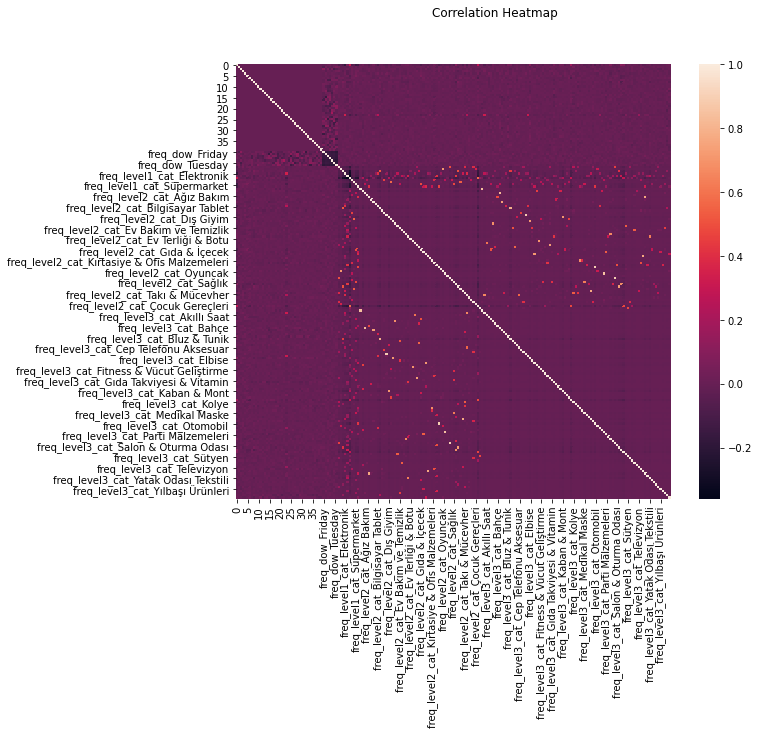

In [84]:
pd.set_option('precision', 2)
plt.figure(figsize=(10,8))
sns.heatmap(train_df.drop("gender", axis=1).corr(), square=True)
plt.suptitle("Correlation Heatmap")
plt.show

In [85]:
cor = train_df.drop("gender", axis=1).corr().abs()

upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any (upper[column] > 0.8)]

In [86]:
to_drop

['freq_level3_cat_Abiye & Mezuniyet Elbisesi',
 'freq_level3_cat_Bebek Bakım',
 'freq_level3_cat_Dijital Kart & Kupon',
 'freq_level3_cat_Otomobil',
 'freq_level3_cat_Parfüm',
 'freq_level3_cat_Saat']

In [87]:
train_df.drop(to_drop, axis=1, inplace=True)
test_df.drop(to_drop, axis=1, inplace=True)

In [88]:
train_df.shape

(5616, 195)

Train & Eval Data Split

In [90]:
X_train, X_eval, y_train, y_eval = train_test_split(train_df.drop("gender", axis=1), train_df["gender"], test_size = 0.3, random_state=582, stratify=train["gender"])

In [91]:
X_train.head()

0     1         2     3     4     5     6         7         8  \
1636 -3.67e-01 -0.24 -2.98e-01 -0.03  0.09 -0.04  0.05 -8.14e-04 -4.06e-03   
3722 -3.03e-01 -0.17 -2.38e-01 -0.07  0.05 -0.06  0.13  2.09e-02 -2.95e-02   
2732 -7.81e-04  0.13 -1.41e-01 -0.11 -0.03 -0.04  0.12  1.06e-01  7.95e-03   
3908  3.27e-01 -0.12 -2.06e-01 -0.08 -0.19  0.08 -0.15 -5.19e-03  6.93e-02   
5352 -7.55e-01  0.13 -8.21e-03  1.23 -0.37 -0.04 -0.02  1.59e-03 -3.20e-03   

             9        10        11        12        13        14        15  \
1636  7.13e-04 -5.71e-04  7.05e-03  1.02e-02  9.90e-04 -1.97e-02  4.23e-03   
3722 -9.14e-03  8.34e-03  4.38e-03  1.52e-03  3.02e-03 -1.18e-02  5.49e-03   
2732 -1.24e-02  1.17e-01 -8.89e-03  2.54e-02  1.03e-02 -2.49e-02  1.72e-02   
3908  5.78e-02  4.61e-02 -3.59e-02 -1.21e-02 -5.52e-03 -5.44e-02  2.01e-02   
5352 -3.99e-03  1.16e-03 -1.68e-05  2.30e-03  6.01e-03 -9.53e-03  4.29e-03   

            16        17        18        19        20        21        22  \
1636 -4.49e-05 -4.48e-03  5.84e-03  5.57e-04 -8.69e-04  8.23e-03  1.12e-04   
3722  1.16e-02  1.07e-02  5.18e-03  1.44e-02  4.11e-02  2.73e-03 -2.76e-03   
2732  2.36e-02  5.32e-02 -5.00e-03  4.94e-02  8.77e-02  3.72e-02 -2.10e-02   
3908  2.74e-03 -3.22e-02 -1.94e-02  3.97e-03  9.95e-03  3.79e-02  5.42e-02   
5352 -5.94e-03 -9.18e-03 -1.73e-03 -1.82e-03 -5.31e-03  9.59e-03 -2.72e-03   

            23        24        25        26        27        28        29  \
1636  5.29e-03  1.18e-03 -4.70e-03 -3.46e-03 -1.34e-03 -3.22e-03 -6.20e-04   
3722 -1.37e-02  1.48e-03 -1.28e-02 -3.06e-03  9.83e-03 -1.48e-02 -3.36e-04   
2732 -9.19e-03  6.08e-03 -5.88e-02 -1.99e-02  2.76e-02 -5.90e-02  3.38e-02   
3908 -1.96e-02 -7.06e-03  1.38e-02 -4.09e-04  3.32e-04  4.09e-03 -2.67e-02   
5352  1.16e-01 -8.53e-03  1.91e-03 -8.44e-05  5.88e-04  8.83e-05 -3.46e-03   

            30        31        32        33        34        35        36  \
1636  2.19e-03  1.27e-03 -5.47e-03 -8.80e-03 -4.01e-03 -3.08e-05  2.72e-03   
3722 -6.24e-03  1.45e-02  7.47e-03 -1.58e-03 -2.40e-02 -3.98e-03  6.47e-03   
2732 -1.06e-02  5.00e-02  5.66e-02 -9.19e-03 -8.16e-02  2.26e-02  1.09e-02   
3908  2.43e-03  2.85e-02 -3.07e-02  1.40e-02  1.22e-04 -7.51e-03 -1.92e-02   
5352  2.93e-04  3.74e-03  1.57e-03  1.32e-03  1.50e-03 -9.00e-04  1.43e-05   

            37        38        39  freq_dow_Friday  freq_dow_Monday  \
1636  1.98e-03 -4.68e-03 -3.92e-04                0                0   
3722 -1.82e-02  2.65e-02 -1.59e-02                0                0   
2732 -3.49e-02  9.89e-02 -1.53e-02                0                0   
3908 -8.00e-03  3.18e-02 -1.27e-02                0                0   
5352 -2.06e-03  3.76e-04  2.96e-04                0                0   

      freq_dow_Saturday  freq_dow_Sunday  freq_dow_Thursday  freq_dow_Tuesday  \
1636                  0                0                  0                 1   
3722                  0                0                  0                 0   
2732                  0                0                  0                 0   
3908                  0                0                  1                 0   
5352                  1                0                  0                 0   

      freq_dow_Wednesday  freq_level1_cat_Aksesuar  \
1636                   0                         0   
3722                   1                         0   
2732                   1                         0   
3908                   0                         0   
5352                   0                         0   

      freq_level1_cat_Anne & Bebek & Çocuk  freq_level1_cat_Ayakkabı  \
1636                                     0                         0   
3722                                     0                         0   
2732                                     0                         0   
3908                                     0                         0   
5352                                     0                     

In [92]:
y_train.head()

1636    M
3722    F
2732    M
3908    M
5352    M
Name: gender, dtype: object

In [93]:
X_eval.head()

0     1     2     3     4     5     6         7         8         9  \
4433 -0.75  0.15  0.07  1.22 -0.38 -0.04 -0.02  3.67e-03 -6.45e-03 -6.59e-03   
1203  0.77 -0.23  0.10  0.07 -0.03  0.10  0.35  5.89e-02 -1.86e-01  1.93e-01   
1543  0.30 -0.36  0.21 -0.03 -0.14 -0.03  0.10  4.36e-02  5.92e-02 -1.97e-02   
4707 -0.47 -0.42  0.34  0.05  0.21  0.02 -0.03  6.16e-03 -1.89e-02 -2.05e-02   
3335 -0.51  0.06 -0.36 -0.05  0.20  0.02 -0.04  1.92e-03 -2.56e-02 -6.67e-04   

            10        11        12        13        14        15        16  \
4433  9.63e-04 -2.31e-03 -1.22e-05  7.03e-03  2.14e-04 -2.97e-03 -9.13e-04   
1203 -1.35e-02  2.36e-01 -2.59e-02 -1.14e-01  2.29e-01 -3.86e-02  6.87e-03   
1543  1.13e-01 -2.10e-02  1.61e-02 -1.04e-01 -5.90e-02 -2.32e-02 -4.18e-02   
4707 -1.15e-03 -5.51e-03 -3.46e-03  2.93e-02  3.30e-03 -7.84e-03 -6.82e-03   
3335 -1.16e-02  7.75e-03 -1.03e-03 -1.69e-02 -9.54e-03  1.20e-03  9.28e-04   

            17        18        19        20        21        22        23  \
4433  7.98e-04  1.99e-03 -1.73e-03  3.31e-03 -4.68e-03  1.40e-03 -3.79e-02   
1203 -6.84e-02 -7.77e-02 -2.63e-02 -1.33e-01 -8.74e-02  4.29e-04  6.28e-03   
1543 -3.38e-02 -6.70e-02  4.21e-02 -5.15e-02  2.28e-02  5.05e-03 -2.27e-02   
4707 -1.83e-03  1.91e-03 -4.62e-03  7.86e-03 -7.41e-03  2.59e-03 -2.16e-02   
3335  5.92e-03  8.50e-04 -5.45e-03 -2.64e-03  1.12e-03  2.75e-03  4.17e-02   

            24        25        26        27        28        29        30  \
4433  2.27e-03  6.18e-04 -4.08e-04 -4.54e-04 -1.53e-03 -1.57e-03  1.01e-03   
1203 -3.83e-02  2.82e-02 -6.74e-02  1.32e-02 -1.42e-02  4.93e-02  8.74e-02   
1543 -3.38e-02  3.93e-04  3.08e-03 -3.93e-02 -3.05e-02 -2.00e-02 -2.82e-02   
4707 -1.43e-03  4.72e-03  2.21e-03 -4.31e-03 -1.00e-03 -8.14e-03  1.28e-03   
3335 -8.26e-03 -1.82e-03  3.50e-03 -1.59e-04  4.19e-03 -2.92e-03  1.08e-03   

            31        32        33        34        35        36        37  \
4433 -6.15e-04 -7.11e-04 -5.97e-04 -7.66e-04 -2.47e-03  7.00e-04 -2.26e-04   
1203  3.59e-02  7.36e-03 -1.55e-01  8.81e-02 -8.79e-03 -3.23e-02 -1.60e-01   
1543 -1.62e-02  1.62e-02 -2.31e-03 -1.11e-02  2.88e-03  1.20e-02  8.71e-03   
4707  5.00e-03 -6.23e-03  6.18e-03  8.52e-04 -7.71e-03  2.73e-03 -6.52e-04   
3335 -2.06e-03  2.72e-03 -3.00e-03  2.87e-03  2.20e-03  1.25e-03 -9.65e-03   

            38        39  freq_dow_Friday  freq_dow_Monday  freq_dow_Saturday  \
4433  2.82e-04  1.83e-03                0                1                  0   
1203 -1.05e-02 -3.57e-02                0                0                  0   
1543  5.26e-03  1.71e-03                0                0                  0   
4707 -3.24e-03 -4.02e-03                1                0                  0   
3335 -3.09e-03 -1.03e-02                0                0                  1   

      freq_dow_Sunday  freq_dow_Thursday  freq_dow_Tuesday  \
4433                0                  0                 0   
1203                1                  0                 0   
1543                0                  1                 0   
4707                0                  0                 0   
3335                0                  0                 0   

      freq_dow_Wednesday  freq_level1_cat_Aksesuar  \
4433                   0                         0   
1203                   0                         0   
1543                   0                         0   
4707                   0                         0   
3335                   0                         0   

      freq_level1_cat_Anne & Bebek & Çocuk  freq_level1_cat_Ayakkabı  \
4433                                     0                         0   
1203                                     0                         0   
1543                                     0                         0   
4707                                     0                         0   
3335                                     0                         0   

      freq_level1_cat_Elektronik  

In [94]:
y_eval.head()

4433    F
1203    F
1543    F
4707    F
3335    M
Name: gender, dtype: object

In [95]:
y_train.value_counts(normalize=True)

F    0.66
M    0.34
Name: gender, dtype: float64

In [96]:
y_eval.value_counts(normalize=True)

F    0.66
M    0.34
Name: gender, dtype: float64

Oversampling

In [98]:
## imblearn installing codes

#conda install -c conda-forge imbalanced-learn
#pip install -c conda-forge imbalanced-learn
#!pip install imblearn
#conda install -c conda-forge imbalanced-learn

In [99]:
from imblearn.over_sampling import RandomOverSampler 

In [100]:
ros = RandomOverSampler(random_state=582)
train_vars_rs, train_labs_rs = ros.fit_resample(X_train, y_train)

## Random Forests with scoring="roc_auc"

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [191]:
rf_classifier = RandomForestClassifier(random_state=582)

In [192]:
#GRID
max_depth_ = range(2,5)
n_estimators_ = [200,300,400,500,800]

#GRID SEARCH
model_rf = rf_classifier
grid_rf = dict(max_depth = max_depth_, n_estimators = n_estimators_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)

In [493]:
grid_search_RF = GridSearchCV(model_rf, grid_rf, cv=cvfold10_rep5, scoring="roc_auc")

In [516]:
search_results_RF = grid_search_RF.fit(X_train, y_train)

In [520]:
best_RF = search_results_RF.best_estimator_

In [650]:
search_results_RF.best_score_

0.7262947546225077

In [521]:
best_RF

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=582)

In [112]:
from sklearn.metrics import accuracy_score

In [528]:
accuracy_score(y_test, best_RF.predict(X_eval))

0.6142433234421365

In [222]:
grid_search_RF = GridSearchCV(model_rf, grid_rf, cv=cvfold10_rep5, scoring="roc_auc")

Training with oversampled data

In [223]:
search_results_RF_OS = grid_search_RF.fit(train_vars_rs, train_labs_rs)

In [224]:
best_RF_OS = search_results_RF_OS.best_estimator_

In [225]:
search_results_RF_OS.best_score_

0.7254826109251049

In [226]:
best_RF_OS

RandomForestClassifier(max_depth=4, n_estimators=400, random_state=582)

In [227]:
accuracy_score(y_eval, best_RF_OS.predict(X_eval))

0.6124629080118694

## Random Forests with scoring="balanced_accuracy"

In [193]:
rf_classifier = RandomForestClassifier(random_state=582)

In [194]:
#GRID
max_depth_ = range(2,5)
n_estimators_ = [200,300,400,500,800]

#GRID SEARCH
model_rf = rf_classifier
grid_rf = dict(max_depth = max_depth_, n_estimators = n_estimators_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)

In [196]:
grid_search_RF_BA = GridSearchCV(model_rf, grid_rf, cv=cvfold10_rep5, scoring="balanced_accuracy")

In [197]:
search_results_RF_BA = grid_search_RF_BA.fit(X_train, y_train)

In [212]:
search_results_RF_BA.best_score_

0.5000735294117648

In [213]:
search_results_RF_BA.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=582)

In [220]:
accuracy_score(y_eval, search_results_RF_BA.best_estimator_.predict(X_eval))

0.6551928783382789

In [198]:
grid_search_RF_BA = GridSearchCV(model_rf, grid_rf, cv=cvfold10_rep5, scoring="balanced_accuracy")

Training with oversampled data

In [199]:
search_results_RF_OS_BA = grid_search_RF_BA.fit(train_vars_rs, train_labs_rs)

In [200]:
search_results_RF_OS_BA.best_score_

0.6631547672910445

In [216]:
search_results_RF_OS_BA.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=800, random_state=582)

In [218]:
accuracy_score(y_eval, search_results_RF_OS_BA.best_estimator_.predict(X_eval))

0.6136498516320474

## Xgboost for Classification - scoring "roc-auc"

In [537]:
#pip install xgboost

In [2]:
from xgboost import XGBClassifier

In [101]:
xgb_classifier = XGBClassifier( seed = 582, eval_metric="auc")

In [104]:
#GRID
eta_ = [0.1, 0.3, 0.5, 0.7]
max_depth_ = [4,5,6,7,10,12,14,16]

#GRID SEARCH
model_xgb = xgb_classifier
grid_xgb = dict(eta=eta_, max_depth = max_depth_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)


with PCA

In [267]:
grid_search_XGB = GridSearchCV(model_xgb, grid_xgb, cv=cvfold10_rep5, scoring="roc_auc")

In [268]:
search_results_XGB = grid_search_XGB.fit(X_train, y_train)

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

In [108]:
best_XGB = search_results_XGB.best_estimator_

In [272]:
search_results_XGB.best_score_

0.7453587021636727

In [874]:
best_XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [274]:
accuracy_score(y_eval, best_XGB.predict(X_eval))

0.6943620178041543

Oversampling

In [269]:
grid_search_XGB = GridSearchCV(model_xgb, grid_xgb, cv=cvfold10_rep5, scoring="roc_auc")

In [270]:
search_results_XGB_OS = grid_search_XGB.fit(train_vars_rs, train_labs_rs)

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

In [275]:
best_XGB_OS = search_results_XGB_OS.best_estimator_

In [276]:
search_results_XGB_OS.best_score_

0.9217271438482189

In [277]:
best_XGB_OS

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [278]:
accuracy_score(y_eval, best_XGB_OS.predict(X_eval))

0.6961424332344214

INCREASING MAX DEPTH since we got 16 (the max given value) for the best model and

DECREASING ETA 

In [234]:
#GRID
eta_ = [0.05, 0.06, 0.08, 0.1, 0.2]
max_depth_rev_ = [16,18,20,22,24]

#GRID SEARCH
model_xgb = xgb_classifier
grid_xgb_rev = dict(eta=eta_, max_depth = max_depth_rev_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)


In [235]:
grid_search_XGB_rev = GridSearchCV(model_xgb, grid_xgb_rev, cv=cvfold10_rep5, scoring="roc_auc")

In [238]:
search_results_XGB_rev = grid_search_XGB_rev.fit(X_train, y_train)

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

In [239]:
best_XGB_rev = search_results_XGB_rev.best_estimator_

In [251]:
best_XGB_rev

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [252]:
search_results_XGB_rev.best_score_

0.7257223915040499

In [262]:
accuracy_score(y_eval,search_results_XGB_rev.best_estimator_.predict(X_eval))

0.6949554896142434

In [240]:
grid_search_XGB_rev = GridSearchCV(model_xgb, grid_xgb_rev, cv=cvfold10_rep5, scoring="roc_auc")

In [241]:
search_results_XGB_OS_rev = grid_search_XGB_rev.fit(train_vars_rs, train_labs_rs)

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

In [242]:
best_XGB_OS_rev = search_results_XGB_OS_rev.best_estimator_

In [253]:
best_XGB_OS_rev

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=22,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [263]:
search_results_XGB_OS_rev.best_score_

0.9221099146381926

In [265]:
accuracy_score(y_eval,best_XGB_OS_rev.predict(X_eval))

0.6896142433234421

## Xgboost for Classification - scoring : "balanced_accuracy"

In [102]:
xgb_classifier = XGBClassifier( seed = 582, eval_metric="auc", objective="binary:logistic")

In [244]:
#GRID
eta_ = [0.1, 0.3, 0.5, 0.7]
max_depth_ = [4,5,6,7,10,12,14,16]

#GRID SEARCH
model_xgb = xgb_classifier
grid_xgb = dict(eta=eta_, max_depth = max_depth_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)


In [245]:
grid_search_XGB_BA = GridSearchCV(model_xgb, grid_xgb, cv=cvfold10_rep5, scoring="balanced_accuracy")

In [246]:
search_results_XGB_BA = grid_search_XGB_BA.fit(X_train, y_train)

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

In [247]:
search_results_XGB_BA.best_score_

0.6319118362695122

In [257]:
search_results_XGB_BA.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [260]:
accuracy_score(y_eval, search_results_XGB_BA.best_estimator_.predict(X_eval))

0.6961424332344214

Training with oversampled data

In [248]:
grid_search_XGB_BA = GridSearchCV(model_xgb, grid_xgb, cv=cvfold10_rep5, scoring="balanced_accuracy")

In [249]:
search_results_XGB_OS_BA = grid_search_XGB_BA.fit(train_vars_rs, train_labs_rs)

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

In [250]:
search_results_XGB_OS_BA.best_score_

0.82384731396857

In [256]:
search_results_XGB_OS_BA.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [259]:
accuracy_score(y_eval, search_results_XGB_OS_BA.best_estimator_.predict(X_eval))

0.6961424332344214

 Expanding the grid

In [106]:
#GRID
eta_ = [0.05, 0.06, 0.08, 0.1, 0.2]
max_depth_rev_ = [16,18,20,22,24]

#GRID SEARCH
model_xgb = xgb_classifier
grid_xgb = dict(eta=eta_, max_depth = max_depth_rev_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)



In [107]:
grid_search_XGB_BA = GridSearchCV(model_xgb, grid_xgb, cv=cvfold10_rep5, scoring="balanced_accuracy")

In [108]:
search_results_XGB_OS_BA_rev = grid_search_XGB_BA.fit(train_vars_rs, train_labs_rs)

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarni

In [109]:
search_results_XGB_OS_BA_rev.best_score_

0.825478086447682

In [110]:
search_results_XGB_OS_BA_rev.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [113]:
accuracy_score(y_eval, search_results_XGB_OS_BA_rev.best_estimator_.predict(X_eval))

0.6896142433234421

## Logistic Regression

In [816]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [823]:
LR_classifier = LogisticRegression(solver="liblinear")

In [825]:
#GRID
penalty_ = ["l1", "l2"]

#GRID SEARCH
model_LR = LR_classifier
grid_LR = dict(penalty=penalty_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)

In [826]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [827]:
search_results_LR = grid_search_LR.fit(X_train, y_train)

In [830]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [831]:
search_results_LR_OS = grid_search_LR.fit(train_vars_rs, train_labs_rs)

In [828]:
best_LR = search_results_LR.best_estimator_

In [829]:
search_results_LR.best_score_

0.7353529256677317

In [832]:
best_LR_OS = search_results_LR_OS.best_estimator_

In [833]:
search_results_LR_OS.best_score_

0.7573914879498084

In [834]:
LR_classifier = LogisticRegression(solver="newton-cg")

In [835]:

#GRID
penalty_ = ["l2", "none"]

#GRID SEARCH
model_LR = LR_classifier
grid_LR = dict(penalty=penalty_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)

In [836]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [837]:
search_results_LR = grid_search_LR.fit(X_train, y_train)

In [838]:
search_results_LR.best_score_

0.7316994107402092

In [839]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [840]:
search_results_LR_OS = grid_search_LR.fit(train_vars_rs, train_labs_rs)

In [841]:
search_results_LR_OS.best_score_

0.7547313968569963

In [842]:
LR_classifier = LogisticRegression(solver="lbfgs")


#GRID
penalty_ = ["l2", "none"]

#GRID SEARCH
model_LR = LR_classifier
grid_LR = dict(penalty=penalty_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)

In [843]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [844]:
search_results_LR = grid_search_LR.fit(X_train, y_train)

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [845]:
search_results_LR.best_score_

0.7317114444044239

In [846]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [847]:
search_results_LR_OS = grid_search_LR.fit(train_vars_rs, train_labs_rs)

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [848]:
search_results_LR_OS.best_score_

0.7547899134316652

In [849]:
LR_classifier = LogisticRegression(solver="sag")


#GRID
penalty_ = ["l2", "none"]

#GRID SEARCH
model_LR = LR_classifier
grid_LR = dict(penalty=penalty_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)

In [850]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [851]:
search_results_LR = grid_search_LR.fit(X_train, y_train)

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

In [852]:
search_results_LR.best_score_

0.7317005531625439

In [853]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [854]:
search_results_LR_OS = grid_search_LR.fit(train_vars_rs, train_labs_rs)

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

In [855]:
search_results_LR_OS.best_score_

0.7552100865683348

In [856]:
LR_classifier = LogisticRegression(solver="saga")


#GRID
penalty_ = ["l1","elasticnet","l2", "none"]

#GRID SEARCH
model_LR = LR_classifier
grid_LR = dict(penalty=penalty_)

cvfold10_rep5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=582)

In [857]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [858]:
search_results_LR = grid_search_LR.fit(X_train, y_train)

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

In [859]:
search_results_LR.best_score_

0.7355653356554385

In [860]:
grid_search_LR = GridSearchCV(model_LR, grid_LR, cv=cvfold10_rep5, scoring="roc_auc")

In [861]:
search_results_LR_OS = grid_search_LR.fit(train_vars_rs, train_labs_rs)

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\asus_pinar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_it

In [862]:
search_results_LR_OS.best_score_

0.7576499864265678

### Model prediction tried in the submission period

In [103]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=22,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1)

In [111]:
xgb_classifier.fit(train_df.drop("gender", axis=1), train_df.loc[:,"gender"])

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_delta_step=0, max_depth=22,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [113]:
rounded = [round(num, 3) for num in xgb_classifier.predict_proba(test_df)[:,0]]

In [114]:
np.array(rounded)

array([0.998, 0.99 , 0.989, 0.999, 0.99 , 0.999, 0.982, 0.89 , 0.993,
       0.973, 0.924, 0.941, 0.997, 0.999, 0.986, 0.967, 0.955, 0.993,
       0.991, 0.989, 0.995, 0.939, 0.99 , 0.999, 0.999, 0.999, 0.998,
       0.998, 0.999, 0.994, 0.998, 0.999, 0.998, 0.993, 0.952, 0.998,
       0.161, 0.969, 0.913, 0.997, 0.997, 0.433, 0.917, 0.998, 0.985,
       1.   , 0.998, 0.994, 0.297, 0.979, 0.997, 0.998, 0.714, 0.853,
       0.527, 0.992, 1.   , 0.998, 0.999, 0.978, 0.998, 0.937, 0.997,
       0.998, 0.995, 0.597, 0.992, 0.999, 0.992, 0.992, 0.999, 0.995,
       0.997, 0.998, 0.997, 0.929, 0.999, 0.998, 0.978, 0.999, 0.696,
       0.997, 0.991, 0.99 , 0.998, 0.996, 0.997, 0.997, 0.993, 0.999,
       0.998, 0.977, 0.408, 0.996, 0.984, 0.815, 0.998, 1.   , 0.97 ,
       0.979, 0.992, 0.999, 0.995, 0.996, 0.999, 0.712, 0.832, 0.14 ,
       0.996, 0.307, 0.999, 0.99 , 0.991, 1.   , 0.694, 0.999, 0.997,
       0.999, 1.   , 0.994, 0.999, 0.997, 0.89 , 0.981, 0.976, 0.987,
       0.986, 0.999,

In [102]:
mdl = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=16,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1)


In [104]:
mdl.fit(train_df.drop("gender", axis=1), train_df.loc[:,"gender"])

C:\Users\asus_pinar\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=16,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=582, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=582, subsample=1, tree_method='exact', validate_parameters=1, ...)

In [105]:
rounded = [round(num, 3) for num in mdl.predict_proba(test_df)[:,0]]

In [106]:
np.array(rounded)

array([0.971, 0.98 , 0.98 , 0.998, 0.951, 0.99 , 0.977, 0.644, 0.988,
       0.953, 0.768, 0.955, 0.984, 0.997, 0.984, 0.96 , 0.88 , 0.984,
       0.983, 0.981, 0.994, 0.744, 0.986, 0.987, 0.996, 0.996, 0.995,
       0.992, 0.996, 0.961, 0.997, 0.998, 0.995, 0.992, 0.957, 0.995,
       0.663, 0.965, 0.859, 0.997, 0.997, 0.543, 0.919, 0.99 , 0.926,
       0.998, 0.979, 0.977, 0.097, 0.959, 0.974, 0.994, 0.636, 0.963,
       0.49 , 0.954, 0.997, 0.994, 0.997, 0.972, 0.998, 0.892, 0.987,
       0.989, 0.995, 0.497, 0.994, 0.992, 0.984, 0.971, 0.994, 0.996,
       0.981, 0.984, 0.996, 0.617, 0.995, 0.989, 0.966, 0.994, 0.786,
       0.995, 0.979, 0.992, 0.997, 0.992, 0.977, 0.987, 0.996, 0.987,
       0.996, 0.963, 0.576, 0.987, 0.987, 0.749, 0.991, 0.996, 0.925,
       0.987, 0.989, 0.999, 0.99 , 0.98 , 0.996, 0.436, 0.721, 0.213,
       0.982, 0.683, 0.994, 0.981, 0.994, 0.996, 0.701, 0.996, 0.958,
       0.996, 0.999, 0.982, 0.995, 0.995, 0.66 , 0.968, 0.937, 0.929,
       0.958, 0.992,

Saving the models and loading a saved model

In [99]:
import pickle

In [885]:
# save the model to disk
#filename = 'XGB_OS_md18.sav'
#pickle.dump(best_XGB_OS_rev, open(filename, 'wb'))

In [100]:
# load the model from disk
#filename = 'XGB_OS_md18.sav'
#loaded_model = pickle.load(open(filename, 'rb'))


In [106]:
rounded = [round(num, 3) for num in loaded_model.predict_proba(test_df)[:,0]]

In [110]:
np.array(rounded)

array([0.877, 0.884, 0.949, 0.999, 0.974, 0.996, 0.933, 0.944, 0.982,
       0.975, 0.741, 0.809, 0.972, 1.   , 0.728, 0.747, 0.891, 0.999,
       0.968, 0.979, 0.973, 0.408, 0.991, 0.997, 0.992, 0.999, 0.995,
       0.998, 0.988, 0.992, 0.998, 0.999, 0.942, 0.997, 0.983, 0.983,
       0.257, 0.964, 0.97 , 0.999, 0.995, 0.892, 0.844, 0.986, 0.979,
       0.999, 0.983, 0.982, 0.222, 0.712, 0.983, 0.998, 0.809, 0.954,
       0.75 , 0.991, 1.   , 0.998, 0.999, 0.95 , 1.   , 0.934, 0.989,
       0.996, 0.98 , 0.413, 0.997, 0.88 , 0.994, 0.989, 0.998, 0.98 ,
       0.985, 0.969, 0.996, 0.4  , 1.   , 0.988, 0.915, 0.999, 0.614,
       0.993, 0.99 , 0.993, 0.997, 0.967, 0.79 , 0.998, 0.995, 0.996,
       0.998, 0.994, 0.901, 0.993, 0.988, 0.434, 0.998, 0.999, 0.75 ,
       0.988, 0.998, 0.997, 0.994, 0.986, 0.999, 0.269, 0.944, 0.512,
       0.997, 0.649, 0.991, 0.968, 0.992, 0.999, 0.691, 0.999, 0.984,
       0.998, 0.999, 0.983, 0.998, 0.991, 0.859, 0.991, 0.956, 0.946,
       0.974, 0.982,